In [1]:
import os
import joblib

import tqdm

import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
import paddle
import paddle.nn.functional as F

In [8]:
target_item_seq = paddle.ones(shape=[1, 4, 3])
target_item_seq

Tensor(shape=[1, 4, 3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [10]:
hist_item_seq = paddle.randn(shape=[1, 4, 3])
hist_item_seq

Tensor(shape=[1, 4, 3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[-0.48787770,  0.34995657, -1.03171074],
         [ 1.79584992, -0.11268010, -0.36966637],
         [-0.52640682,  0.02184287, -0.40044743],
         [-1.67469907,  0.04491538,  1.10482061]]])

In [27]:
concat = paddle.concat(
    [
        hist_item_seq, target_item_seq, hist_item_seq - target_item_seq, hist_item_seq * target_item_seq
    ],
    axis=-1
)

concat

Tensor(shape=[1, 4, 12], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[-0.48787770,  0.34995657, -1.03171074,  1.        ,  1.        ,
           1.        , -1.48787773, -0.65004343, -2.03171062, -0.48787770,
           0.34995657, -1.03171074],
         [ 1.79584992, -0.11268010, -0.36966637,  1.        ,  1.        ,
           1.        ,  0.79584992, -1.11268008, -1.36966634,  1.79584992,
          -0.11268010, -0.36966637],
         [-0.52640682,  0.02184287, -0.40044743,  1.        ,  1.        ,
           1.        , -1.52640676, -0.97815710, -1.40044737, -0.52640682,
           0.02184287, -0.40044743],
         [-1.67469907,  0.04491538,  1.10482061,  1.        ,  1.        ,
           1.        , -2.67469907, -0.95508462,  0.10482061, -1.67469907,
           0.04491538,  1.10482061]]])

In [28]:
attention = paddle.nn.Linear(
    12, 1
)

In [29]:
concat = attention(concat)

In [30]:
concat

Tensor(shape=[1, 4, 1], dtype=float32, place=Place(cpu), stop_gradient=False,
       [[[-1.04129004],
         [-1.11228538],
         [-0.55335939],
         [-0.11720708]]])

In [19]:
mask = paddle.to_tensor(
    [[[0], [0], [-1e9], [-1e9]]]
)

mask

Tensor(shape=[1, 4, 1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[ 0.         ],
         [ 0.         ],
         [-1000000000.],
         [-1000000000.]]])

In [38]:
attn_fc = concat + mask
attn_fc

Tensor(shape=[1, 4, 1], dtype=float32, place=Place(cpu), stop_gradient=False,
       [[[-1.04129004 ],
         [-1.11228538 ],
         [-1000000000.],
         [-1000000000.]]])

In [32]:
attn_fc = attn_fc.transpose(perm=(0,2,1))
attn_fc

Tensor(shape=[1, 1, 4], dtype=float32, place=Place(cpu), stop_gradient=False,
       [[[-1.04129004 , -1.11228538 , -1000000000., -1000000000.]]])

In [33]:
weight = F.softmax(attn_fc)
weight

Tensor(shape=[1, 1, 4], dtype=float32, place=Place(cpu), stop_gradient=False,
       [[[0.51774138, 0.48225862, 0.00000000, 0.00000000]]])

In [26]:
hist_item_seq

Tensor(shape=[1, 4, 3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[-0.48787770,  0.34995657, -1.03171074],
         [ 1.79584992, -0.11268010, -0.36966637],
         [-0.52640682,  0.02184287, -0.40044743],
         [-1.67469907,  0.04491538,  1.10482061]]])

In [34]:
paddle.matmul(weight, hist_item_seq)

Tensor(shape=[1, 1, 3], dtype=float32, place=Place(cpu), stop_gradient=False,
       [[[ 0.61346960,  0.12684606, -0.71243417]]])

In [42]:
paddle.sum(F.softmax(attn_fc, axis=1) * hist_item_seq, axis=1)

Tensor(shape=[1, 3], dtype=float32, place=Place(cpu), stop_gradient=False,
       [[ 0.61346960,  0.12684606, -0.71243417]])

In [53]:
tensor = paddle.to_tensor([[1, 0, 0], [2, 0, 0]]).astype("float32")
tensor

Tensor(shape=[2, 3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[1., 0., 0.],
        [2., 0., 0.]])

In [54]:
max_tensor = paddle.max(tensor, axis=-1).unsqueeze(-1)
max_tensor

Tensor(shape=[2, 1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[1.],
        [2.]])

In [55]:
paddle.expand(max_tensor, shape=[-1, 3])

Tensor(shape=[2, 3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[1., 1., 1.],
        [2., 2., 2.]])

In [65]:
paddle.nn.Softmax()(paddle.randn(shape=[1, 20]))

Tensor(shape=[1, 20], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[0.02221179, 0.00972609, 0.09148084, 0.07356174, 0.02146498, 0.08397387,
         0.01598887, 0.19576141, 0.01758603, 0.12858365, 0.05523943, 0.02584884,
         0.02648066, 0.02628798, 0.01242645, 0.07781595, 0.01374068, 0.04915189,
         0.02662050, 0.02604840]])

In [75]:
F.sigmoid(paddle.randn(shape=[1, 20]).unsqueeze(-1))

Tensor(shape=[1, 20, 1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[0.70272416],
         [0.23114847],
         [0.74185550],
         [0.63527131],
         [0.26915082],
         [0.53598624],
         [0.77561128],
         [0.65949184],
         [0.72481376],
         [0.43028980],
         [0.54291338],
         [0.04649547],
         [0.18443491],
         [0.37719294],
         [0.42208949],
         [0.26307574],
         [0.50411028],
         [0.50585264],
         [0.86717278],
         [0.35580295]]])

# 按照28+2的比例从训练集中划分出验证集

In [4]:
train_folder = "../../data/2023-cvr-contest-data/train_data"
train_file_ls = sorted(os.listdir(train_folder))

train_file_ls

['file_01.txt',
 'file_02.txt',
 'file_03.txt',
 'file_04.txt',
 'file_05.txt',
 'file_06.txt',
 'file_07.txt',
 'file_08.txt',
 'file_09.txt',
 'file_10.txt',
 'file_11.txt',
 'file_12.txt',
 'file_13.txt',
 'file_14.txt',
 'file_15.txt',
 'file_16.txt',
 'file_17.txt',
 'file_18.txt',
 'file_19.txt',
 'file_20.txt',
 'file_21.txt',
 'file_22.txt',
 'file_23.txt',
 'file_24.txt',
 'file_25.txt',
 'file_26.txt',
 'file_27.txt',
 'file_28.txt',
 'file_29.txt',
 'file_30.txt']

In [3]:
train1, train2, train3 = [], [], []
test1, test2, test3 = [], [], []

In [5]:
for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            if t1 in ["0", "1"]:
                curr_f = test1 if "29" in _file or "30" in _file else train1
            elif t2 in ["0", "1"]:
                curr_f = test2 if "29" in _file or "30" in _file else train2
            elif t3 in ["0", "1"]:
                curr_f = test3 if "29" in _file or "30" in _file else train3
            
            curr_f.append(line)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:20<00:00,  1.44it/s]


In [6]:
len(train1), len(train2), len(train3)

(2048925, 2072507, 2604073)

In [7]:
len(test1), len(test2), len(test3)

(165643, 126040, 172932)

In [7]:
for file_name, line_ls in {
    "./file_t1.txt": train1, 
    "./file_t2.txt": train2, 
    "./file_t3.txt": train3
}.items():
    with open(file_name, "w") as f:
        for line in line_ls:
            f.write(line)

In [8]:
for file_name, line_ls in {
    "./test_t1.txt": test1, 
    "./test_t2.txt": test2, 
    "./test_t3.txt": test3
}.items():
    with open(file_name, "w") as f:
        for line in line_ls:
            f.write(line)

In [3]:
720/30

24.0

# log_key包含重复值

In [27]:
log_keys = {}

for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]

            if log_key not in log_keys:
                log_keys[log_key] = 0
            
            log_keys[log_key] += 1

100%|██████████| 30/30 [00:21<00:00,  1.35it/s]


In [36]:
log_keys_freq = {}

for k, v in log_keys.items():
    if v not in log_keys_freq:
        log_keys_freq[v] = 0
    
    log_keys_freq[v] += 1

In [34]:
log_keys_freq

{1: 7178128, 2: 5990, 3: 4}

In [35]:
for k, v in log_keys.items():
    if v == 3:
        print(k, v)

4193316555 3
1399076553 3
3799200581 3
1994649457 3


# 可以凭借某些字段来辨别广告类型

In [4]:
record = "1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26"

conv1, conv2, conv3, duplicated123, duplicated12, duplicated13, duplicated23 = {}, {}, {}, {}, {}, {}, {}

for _key in record.split(","):
    conv1[_key] = set()
    conv2[_key] = set()
    conv3[_key] = set()
    duplicated123[_key] = set()
    duplicated12[_key] = set()
    duplicated13[_key] = set()
    duplicated23[_key] = set()

In [5]:
for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            if t1 in ["0", "1"]:
                curr_conv = conv1
            elif t2 in ["0", "1"]:
                curr_conv = conv2
            elif t3 in ["0", "1"]:
                curr_conv = conv3
            
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _value = _f.split(":")[0]
                _key = _f.split(":")[1]
                
                curr_conv[_key].add(_value)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [10:42<00:00, 21.40s/it]


In [163]:
for _key in record.split(","):
    intersection12 = conv1[_key].intersection(conv2[_key])
    intersection23 = conv2[_key].intersection(conv3[_key])
    intersection13 = conv1[_key].intersection(conv3[_key])
    intersection123 = conv1[_key].intersection(conv2[_key]).intersection(conv3[_key])
    
    duplicated12[_key].update(intersection12)
    duplicated13[_key].update(intersection13)
    duplicated23[_key].update(intersection23)
    duplicated123[_key].update(intersection123)

In [153]:
for k, v in conv1.items():
    print(f"[{k}] -- conv1: {len(v)}; \tconv2: {len(conv2[k])}; \tconv3: {len(conv3[k])}; \tduplicated: {len(duplicated123[k])}")

[1] -- conv1: 7; 	conv2: 7; 	conv3: 7; 	duplicated: 0
[2] -- conv1: 3; 	conv2: 3; 	conv3: 3; 	duplicated: 0
[3] -- conv1: 2150413; 	conv2: 2115505; 	conv3: 2691446; 	duplicated: 0
[4] -- conv1: 1765698; 	conv2: 1508849; 	conv3: 2051660; 	duplicated: 0
[5] -- conv1: 4; 	conv2: 4; 	conv3: 4; 	duplicated: 0
[6] -- conv1: 3; 	conv2: 3; 	conv3: 3; 	duplicated: 0
[7] -- conv1: 6; 	conv2: 6; 	conv3: 6; 	duplicated: 6
[8] -- conv1: 6; 	conv2: 6; 	conv3: 6; 	duplicated: 0
[9] -- conv1: 2; 	conv2: 2; 	conv3: 2; 	duplicated: 0
[10] -- conv1: 2058747; 	conv2: 1360987; 	conv3: 2599295; 	duplicated: 52
[11] -- conv1: 37; 	conv2: 37; 	conv3: 37; 	duplicated: 0
[12] -- conv1: 0; 	conv2: 0; 	conv3: 0; 	duplicated: 0
[13] -- conv1: 24; 	conv2: 24; 	conv3: 24; 	duplicated: 24
[14] -- conv1: 2; 	conv2: 2; 	conv3: 2; 	duplicated: 0
[15] -- conv1: 346; 	conv2: 398; 	conv3: 368; 	duplicated: 0
[16] -- conv1: 1; 	conv2: 1; 	conv3: 1; 	duplicated: 1
[17] -- conv1: 6565679; 	conv2: 2944406; 	conv3: 8161049; 	du

In [154]:
for k, v in duplicated12.items():
    if k == "12":
        continue
    print(f"{k}, {len(v)}")

1, 0
2, 0
3, 0
4, 0
5, 0
6, 0
7, 6
8, 0
9, 0
10, 577
11, 0
13, 24
14, 0
15, 0
16, 1
17, 6131
18, 89000
19, 0
20, 5556
21, 0
22, 4016
23, 0
24, 240
25, 0
26, 1433


In [155]:
for k, v in duplicated13.items():
    if k == "12":
        continue
    print(f"{k}, {len(v)}")

1, 0
2, 0
3, 0
4, 0
5, 0
6, 0
7, 6
8, 0
9, 0
10, 170
11, 0
13, 24
14, 0
15, 0
16, 1
17, 14711
18, 10793
19, 0
20, 7015
21, 0
22, 2054
23, 0
24, 267
25, 0
26, 1397


In [156]:
for k, v in duplicated23.items():
    if k == "12":
        continue
    print(f"{k}, {len(v)}")

1, 0
2, 0
3, 0
4, 0
5, 0
6, 0
7, 6
8, 0
9, 0
10, 81
11, 0
13, 24
14, 0
15, 0
16, 1
17, 37
18, 19161
19, 0
20, 5122
21, 0
22, 1538
23, 0
24, 284
25, 0
26, 1386


In [157]:
for k, v in duplicated123.items():
    if k == "12":
        continue
    print(f"{k}, {len(v)}")

1, 0
2, 0
3, 0
4, 0
5, 0
6, 0
7, 6
8, 0
9, 0
10, 52
11, 0
13, 24
14, 0
15, 0
16, 1
17, 0
18, 5079
19, 0
20, 3780
21, 0
22, 1298
23, 0
24, 240
25, 0
26, 1324


# 测试集中，某些字段包含了训练集中不包含的值

In [3]:
test_folder = "../../data/data204194/test_data"
test_file_ls = sorted(os.listdir(test_folder))

test_file_ls

['file_test.txt']

In [7]:
test = {}
test_in_train = {}

for _key in record.split(","):
    test[_key] = set()
    test_in_train[_key] = set()

In [8]:
for _file in test_file_ls:
    with open(os.path.join(test_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _value = _f.split(":")[0]
                _key = _f.split(":")[1]
                
                if _value not in conv1[_key] and _value not in conv2[_key] and _value not in conv3[_key]:
                    test[_key].add(_value)
                    
                if _value in conv1[_key] or _value in conv2[_key] or _value in conv3[_key]:
                    test_in_train[_key].add(_value)

In [11]:
for _k, _v in test.items():
    print(f"{_k}, {len(_v)}")

1, 0
2, 0
3, 224082
4, 156423
5, 0
6, 0
7, 0
8, 0
9, 0
10, 152719
11, 0
12, 0
13, 0
14, 0
15, 3
16, 0
17, 469086
18, 64872
19, 11218
20, 234
21, 0
22, 1319059
23, 8541
24, 3
25, 4
26, 15


In [12]:
for _k, _v in test_in_train.items():
    print(f"{_k}, {len(_v)}")

1, 21
2, 9
3, 9109
4, 48429
5, 12
6, 9
7, 6
8, 18
9, 6
10, 530309
11, 111
12, 0
13, 24
14, 6
15, 418
16, 1
17, 721842
18, 381718
19, 37510
20, 17376
21, 13
22, 781056
23, 37003
24, 364
25, 466
26, 1052


# 根据各列特征长度猜测用户和广告id字段

In [167]:
len1, len2, len3 = {}, {}, {}

for _key in record.split(","):
    len1[_key] = [100, -1]
    len2[_key] = [100, -1]
    len3[_key] = [100, -1]

In [5]:
for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            if t1 in ["0", "1"]:
                curr_len = len1
            elif t2 in ["0", "1"]:
                curr_len = len2
            elif t3 in ["0", "1"]:
                curr_len = len3
            
            feature_ls = features.split(" ")
            
            curr_line = {}
            
            for i in range(1, 26+1):
                curr_line[str(i)] = 0
            
            for _f in feature_ls:
                _value = _f.split(":")[0]
                _key = _f.split(":")[1]
                
                curr_line[_key] += 1
            
            for _k, _v in curr_line.items():
                curr_len[_k][0] = min(curr_len[_k][0], _v)
                curr_len[_k][1] = max(curr_len[_k][1], _v)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [11:42<00:00, 23.42s/it]


In [8]:
for k, v in len1.items():
    print(f"[{k}] -- conv1: {v}, conv2: {len2[k]}, conv3: {len3[k]}")

[1] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[2] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[3] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[4] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[5] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[6] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[7] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[8] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[9] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[10] -- conv1: [0, 20], conv2: [0, 20], conv3: [0, 20]
[11] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[12] -- conv1: [0, 0], conv2: [0, 0], conv3: [0, 0]
[13] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[14] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[15] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[16] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[17] -- conv1: [0, 10], conv2: [0, 10], conv3: [0, 10]
[18] -- conv1: [0, 10], conv2: [0, 10], conv3: [0, 10]
[19] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1]
[20] -- conv

In [9]:
test_len = {}

for _key in record.split(","):
    test_len[_key] = [100, -1]

In [12]:
for _file in tqdm.tqdm(test_file_ls):
    with open(os.path.join(test_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            feature_ls = features.split(" ")
            
            curr_line = {}
            
            for i in range(1, 26+1):
                curr_line[str(i)] = 0
            
            for _f in feature_ls:
                _value = _f.split(":")[0]
                _key = _f.split(":")[1]
                
                curr_line[_key] += 1
            
            for _k, _v in curr_line.items():
                test_len[_k][0] = min(test_len[_k][0], _v)
                test_len[_k][1] = max(test_len[_k][1], _v)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.91s/it]


In [17]:
for k, v in test_len.items():
    print(f"[{k}] -- conv1: {len1[k]}, conv2: {len2[k]}, conv3: {len3[k]}, test: {v}")

[1] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[2] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[3] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[4] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[5] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[6] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[7] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[8] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[9] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[10] -- conv1: [0, 20], conv2: [0, 20], conv3: [0, 20], test: [0, 20]
[11] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[12] -- conv1: [0, 0], conv2: [0, 0], conv3: [0, 0], test: [0, 0]
[13] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[14] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[15] -- conv1: [1, 1], conv2: [1, 1], conv3: [1, 1], test: [1, 1]
[16] -- conv1: 

# 根据字段9划分1/2/3

## train

In [19]:
f1, f2, f3 = [], [], []

cnt = 0

In [20]:
for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            cnt += 1
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            if t1 in ["0", "1"]:
                curr_f = f1
            elif t2 in ["0", "1"]:
                curr_f = f2
            elif t3 in ["0", "1"]:
                curr_f = f3
            
            curr_f.append(line)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:23<00:00,  1.29it/s]


In [23]:
len(f1), len(f2), len(f3), cnt

(2214568, 2198547, 2777005, 7190120)

In [21]:
len(f1) + len(f2) + len(f3) == cnt

True

In [25]:
for file_name, line_ls in {
    "./file_t1.txt": f1, 
    "./file_t2.txt": f2, 
    "./file_t3.txt": f3
}.items():
    with open(file_name, "w") as f:
        for line in line_ls:
            f.write(line)

## test

In [27]:
conv1["9"], conv2["9"], conv3["9"]

({'2367', '321'}, {'167', '350'}, {'75', '9'})

In [43]:
f1, f2, f3 = [], [], []
cnt = 0

for _file in tqdm.tqdm(test_file_ls):
    with open(os.path.join(test_folder, _file), "r") as f:
        for line in f:
            cnt += 1
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _key = _f.split(":")[1]
                
                if _key != "9":
                    continue
                    
                _value = _f.split(":")[0]
                
                if _value in ['2367', '321']:
                    curr_f = f1
                elif _value in ['167', '350']:
                    curr_f = f2
                elif _value in ['75', '9']:
                    curr_f = f3
                    
                curr_f.append(line)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.77s/it]


In [44]:
len(f1), len(f2), len(f3), cnt

(80383, 69659, 84870, 234912)

In [46]:
for file_name, line_ls in {
    "./test_t1.txt": f1, 
    "./test_t2.txt": f2, 
    "./test_t3.txt": f3
}.items():
    with open(file_name, "w") as f:
        for line in line_ls:
            f.write(line)

# 用户id探索

## 假设3是用户id

In [19]:
user_count = {}

In [20]:
for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")

            features = items[4]
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _key = _f.split(":")[1]

                if _key != "3":
                    continue

                _value = _f.split(":")[0]

                if _value not in user_count:
                    user_count[_value] = 0

                user_count[_value] += 1

100%|██████████| 30/30 [02:53<00:00,  5.74s/it]


In [21]:
freq = {}

for k, v in user_count.items():
    if v not in freq:
        freq[v] = 0

    freq[v] += 1

In [22]:
dict(sorted(freq.items()))

{1: 6756306,
 2: 177874,
 3: 17727,
 4: 3668,
 5: 1100,
 6: 391,
 7: 163,
 8: 72,
 9: 31,
 10: 16,
 11: 6,
 12: 1,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 1}

## 假设4是用户id

In [23]:
user_count = {}

for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")

            features = items[4]
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _key = _f.split(":")[1]

                if _key != "4":
                    continue

                _value = _f.split(":")[0]

                if _value not in user_count:
                    user_count[_value] = 0

                user_count[_value] += 1

100%|██████████| 30/30 [02:54<00:00,  5.70s/it]


In [25]:
freq = {}

for k, v in user_count.items():
    if v not in freq:
        freq[v] = 0

    if v in [48797, 201027, 494026]:
        print(k, v)

    freq[v] += 1

1528 494026
15363 48797
5335 201027


In [18]:
dict(sorted(freq.items()))

{1: 4585770,
 2: 530651,
 3: 127643,
 4: 44093,
 5: 18278,
 6: 8748,
 7: 4504,
 8: 2531,
 9: 1391,
 10: 850,
 11: 589,
 12: 358,
 13: 243,
 14: 156,
 15: 120,
 16: 79,
 17: 58,
 18: 32,
 19: 26,
 20: 21,
 21: 14,
 22: 11,
 23: 9,
 24: 3,
 25: 5,
 26: 3,
 27: 6,
 28: 4,
 29: 1,
 30: 1,
 31: 2,
 35: 1,
 38: 1,
 40: 2,
 48797: 1,
 201027: 1,
 494026: 1}

# 广告id探索

## 假设19是广告id

In [46]:
ad_count = {}

for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")

            features = items[4]
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _key = _f.split(":")[1]

                if _key != "19":
                    continue

                _value = _f.split(":")[0]

                if _value not in ad_count:
                    ad_count[_value] = 0

                ad_count[_value] += 1

100%|██████████| 30/30 [02:59<00:00,  5.84s/it]


In [47]:
ad_count_freq = {}

for k, v in ad_count.items():
    if v not in ad_count_freq:
        ad_count_freq[v] = 0

    ad_count_freq[v] += 1

In [48]:
dict(sorted(ad_count_freq.items(), reverse=True))

{23771: 1,
 21747: 1,
 19614: 1,
 19318: 1,
 18671: 1,
 17658: 1,
 15437: 1,
 14901: 1,
 14749: 1,
 10977: 1,
 10754: 1,
 10361: 1,
 8862: 1,
 8649: 1,
 8268: 1,
 8058: 1,
 7590: 1,
 7493: 1,
 7071: 1,
 6726: 1,
 6678: 1,
 6561: 1,
 6397: 1,
 6152: 1,
 6040: 1,
 5541: 1,
 5503: 1,
 5459: 1,
 5302: 1,
 5300: 1,
 5218: 1,
 5153: 1,
 5018: 1,
 4926: 1,
 4902: 1,
 4786: 1,
 4688: 1,
 4573: 1,
 4427: 1,
 4422: 1,
 4335: 1,
 4279: 1,
 4223: 1,
 4163: 1,
 4141: 1,
 4024: 1,
 4023: 1,
 3945: 1,
 3917: 1,
 3857: 1,
 3828: 1,
 3750: 1,
 3727: 1,
 3718: 1,
 3650: 1,
 3543: 1,
 3494: 1,
 3444: 1,
 3422: 1,
 3303: 1,
 3274: 1,
 3244: 1,
 3170: 1,
 3118: 1,
 3115: 1,
 3111: 1,
 3096: 1,
 3046: 1,
 2994: 1,
 2982: 1,
 2970: 1,
 2938: 1,
 2916: 1,
 2905: 1,
 2843: 1,
 2811: 1,
 2804: 1,
 2802: 1,
 2761: 1,
 2751: 1,
 2737: 1,
 2702: 1,
 2687: 1,
 2612: 1,
 2591: 1,
 2565: 1,
 2558: 1,
 2549: 1,
 2525: 1,
 2500: 1,
 2496: 2,
 2480: 1,
 2469: 1,
 2443: 1,
 2421: 1,
 2384: 1,
 2374: 1,
 2359: 1,
 2354: 1

## 假设23是广告id

In [42]:
ad_count = {}

for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")

            features = items[4]
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _key = _f.split(":")[1]

                if _key != "23":
                    continue

                _value = _f.split(":")[0]

                if _value not in ad_count:
                    ad_count[_value] = 0

                ad_count[_value] += 1

100%|██████████| 30/30 [02:57<00:00,  5.92s/it]


In [43]:
ad_count_freq = {}

for k, v in ad_count.items():
    if v not in ad_count_freq:
        ad_count_freq[v] = 0

    ad_count_freq[v] += 1

In [45]:
dict(sorted(ad_count_freq.items(), reverse=True))

{49983: 1,
 28734: 1,
 19192: 1,
 18445: 1,
 17148: 1,
 16093: 1,
 14613: 1,
 13369: 1,
 12255: 1,
 10307: 1,
 9780: 1,
 9064: 1,
 8772: 1,
 8659: 1,
 8331: 1,
 8251: 1,
 8058: 1,
 8013: 1,
 7784: 1,
 7670: 1,
 7493: 1,
 7413: 1,
 7398: 1,
 7374: 1,
 7229: 1,
 7101: 1,
 6971: 1,
 6876: 1,
 6778: 1,
 6555: 1,
 6512: 1,
 6483: 1,
 6429: 1,
 6149: 1,
 6109: 1,
 6028: 1,
 5991: 1,
 5918: 1,
 5855: 1,
 5834: 1,
 5738: 1,
 5529: 1,
 5494: 1,
 5459: 1,
 5452: 1,
 5383: 1,
 5300: 1,
 5220: 1,
 5219: 1,
 5217: 1,
 5174: 1,
 5163: 1,
 5149: 1,
 5135: 1,
 5018: 1,
 5006: 1,
 4982: 1,
 4845: 1,
 4811: 1,
 4681: 1,
 4655: 1,
 4618: 1,
 4608: 1,
 4598: 1,
 4583: 1,
 4571: 1,
 4554: 1,
 4540: 1,
 4466: 1,
 4446: 1,
 4445: 1,
 4361: 1,
 4352: 1,
 4278: 1,
 4213: 1,
 4202: 1,
 4077: 1,
 4012: 1,
 3964: 1,
 3956: 1,
 3945: 1,
 3930: 1,
 3898: 1,
 3897: 1,
 3886: 1,
 3857: 2,
 3854: 1,
 3836: 1,
 3755: 1,
 3749: 1,
 3748: 1,
 3734: 1,
 3687: 1,
 3655: 2,
 3627: 1,
 3598: 1,
 3562: 1,
 3546: 2,
 3525: 1,


# 统计转化比例

In [49]:
conv1_cnt, conv2_cnt, conv3_cnt = {"0": 0, "1": 0}, {"0": 0, "1": 0}, {"0": 0, "1": 0}

for _file in tqdm.tqdm(train_file_ls):
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            if t1 in ["0", "1"]:
                conv1_cnt[t1] += 1
            elif t2 in ["0", "1"]:
                conv2_cnt[t2] += 1
            elif t3 in ["0", "1"]:
                conv3_cnt[t3] += 1

100%|██████████| 30/30 [00:19<00:00,  1.56it/s]


In [137]:
for idx, conv_cnt in enumerate([conv1_cnt, conv2_cnt, conv3_cnt]):
    print(f"conv{idx+1}: [total]{conv_cnt['1'] + conv_cnt['0']}, [pos]{conv_cnt['1']}, [neg]{conv_cnt['0']}, [pct]{100 * conv_cnt['1'] / (conv_cnt['0'] + conv_cnt['1'])}%")

conv1: [total]2214568, [pos]131286, [neg]2083282, [pct]5.928289400009392%
conv2: [total]2198547, [pos]232199, [neg]1966348, [pct]10.561475374417741%
conv3: [total]2777005, [pos]107183, [neg]2669822, [pct]3.859661757901048%


# 统计每一天的转化比例

In [67]:
conv1_cnt, conv2_cnt, conv3_cnt = {}, {}, {}

for _file in tqdm.tqdm(train_file_ls):
    day = _file.split(".")[0][-2:]
    
    conv1_cnt[day] = {}
    conv2_cnt[day] = {}
    conv3_cnt[day] = {}
            
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            if t1 in ["0", "1"]:
                curr_cnt = conv1_cnt[day].get(t1, 0)
                conv1_cnt[day].update({t1: curr_cnt+1})
            elif t2 in ["0", "1"]:
                curr_cnt = conv2_cnt[day].get(t2, 0)
                conv2_cnt[day].update({t2: curr_cnt+1})
            elif t3 in ["0", "1"]:
                curr_cnt = conv3_cnt[day].get(t3, 0)
                conv3_cnt[day].update({t3: curr_cnt+1})

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:20<00:00,  1.48it/s]


In [68]:
conv1_pct = []

for day, conv_type in conv1_cnt.items():
    conv1_pct.append(conv_type['1']/(conv_type['0']+conv_type['1']))

In [69]:
conv2_pct = []

for day, conv_type in conv2_cnt.items():
    conv2_pct.append(conv_type['1']/(conv_type['0']+conv_type['1']))

In [70]:
conv3_pct = []

for day, conv_type in conv3_cnt.items():
    conv3_pct.append(conv_type['1']/(conv_type['0']+conv_type['1']))

In [71]:
conv_pct_df = pd.DataFrame(
    {
        "day": range(1, 31),
        "conv1": conv1_pct,
        "conv2": conv2_pct,
        "conv3": conv3_pct
    }
)

In [72]:
melted_conv_pct_df = pd.melt(conv_pct_df, id_vars=["day"], value_vars=["conv1", "conv2", "conv3"], var_name="conv")
melted_conv_pct_df

,day,conv,value
0,1,conv1,0.055873
1,2,conv1,0.060189
2,3,conv1,0.061369
3,4,conv1,0.062588
4,5,conv1,0.060992
...,...,...,...
85,26,conv3,0.042247
86,27,conv3,0.042295
87,28,conv3,0.041066
88,29,conv3,0.041103


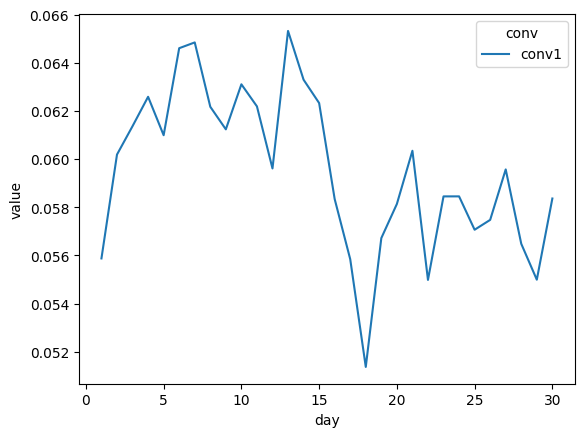

In [73]:
# 每类广告转化率
sns.lineplot(data=melted_conv_pct_df[melted_conv_pct_df.conv=="conv1"], x="day", y="value", hue="conv");

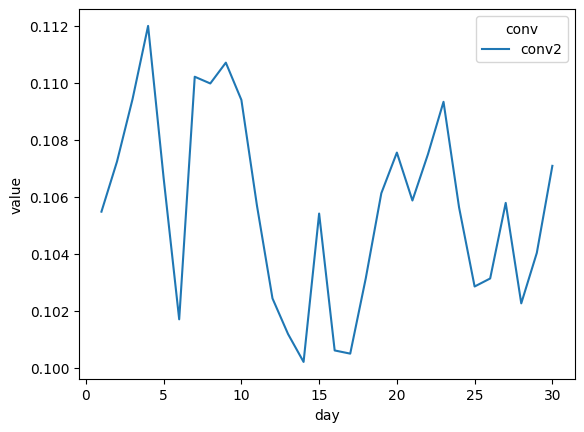

In [74]:
sns.lineplot(data=melted_conv_pct_df[melted_conv_pct_df.conv.isin(["conv2"])], x="day", y="value", hue="conv");

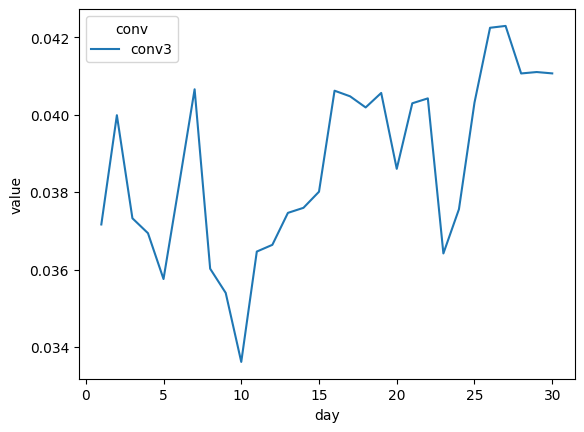

In [75]:
sns.lineplot(data=melted_conv_pct_df[melted_conv_pct_df.conv=="conv3"], x="day", y="value", hue="conv");

In [201]:
melted_conv1 = melted_conv_pct_df[melted_conv_pct_df["conv"] == "conv1"].reset_index(drop=True)
melted_conv1["lag_value"] = melted_conv1["value"].shift(1)

melted_conv1.describe()

,day,value,lag_value
count,30.000000,30.000000,29.000000
mean,15.500000,0.059543,0.059584
std,8.803408,0.003347,0.003399
min,1.000000,0.051366,0.051366
25%,8.250000,0.057167,0.057065
50%,15.500000,0.059591,0.059611
75%,22.750000,0.062186,0.062190
max,30.000000,0.065324,0.065324


In [202]:
def assign_label1(val):
    if val >= 0.062186:
        return 3
    
    if val >= 0.059591:
        return 2
    
    if val >= 0.057167:
        return 1
    
    return 0

In [217]:
melted_conv1["label"] = melted_conv1["value"].apply(assign_label1)
melted_conv1["lag_label"] = melted_conv1["label"].shift(1)
melted_conv1["lag_label"].fillna(melted_conv1["label"], inplace=True)

melted_conv1["emb_num"] = (30721510 + melted_conv1["lag_label"]).astype(int)

In [240]:
melted_conv1

,day,conv,value,lag_value,label,lag_label,emb_num
0,1,conv1,0.055873,NaN,0,0.0,30721510
1,2,conv1,0.060189,0.055873,2,0.0,30721510
2,3,conv1,0.061369,0.060189,2,2.0,30721512
3,4,conv1,0.062588,0.061369,3,2.0,30721512
4,5,conv1,0.060992,0.062588,2,3.0,30721513
5,6,conv1,0.064607,0.060992,3,2.0,30721512
6,7,conv1,0.064847,0.064607,3,3.0,30721513
7,8,conv1,0.062174,0.064847,2,3.0,30721513
8,9,conv1,0.061236,0.062174,2,2.0,30721512
9,10,conv1,0.063107,0.061236,3,2.0,30721512


In [234]:
idx_map = {}

for idx, row in melted_conv1.iterrows():
    idx_map[row["day"]] = row["emb_num"]

In [235]:
idx_map

{1: 30721510,
 2: 30721510,
 3: 30721512,
 4: 30721512,
 5: 30721513,
 6: 30721512,
 7: 30721513,
 8: 30721513,
 9: 30721512,
 10: 30721512,
 11: 30721513,
 12: 30721513,
 13: 30721512,
 14: 30721513,
 15: 30721513,
 16: 30721513,
 17: 30721511,
 18: 30721510,
 19: 30721510,
 20: 30721510,
 21: 30721511,
 22: 30721512,
 23: 30721510,
 24: 30721511,
 25: 30721511,
 26: 30721510,
 27: 30721511,
 28: 30721511,
 29: 30721510,
 30: 30721510}

In [226]:
joblib.dump(idx_map, "./idx_map1.pkl")

['./idx_map1.pkl']

In [204]:
melted_conv1["label"].value_counts()

0    8
3    8
2    7
1    7
Name: label, dtype: int64

In [250]:
from scipy.stats import linregress

In [268]:
slope, intercept, r_value, p_value, std_err = linregress(x=melted_conv1.dropna()["lag_value"], y=melted_conv1.dropna()["value"])

In [269]:
p_value

0.0003204343155498539

<Axes: xlabel='value', ylabel='lag_value'>

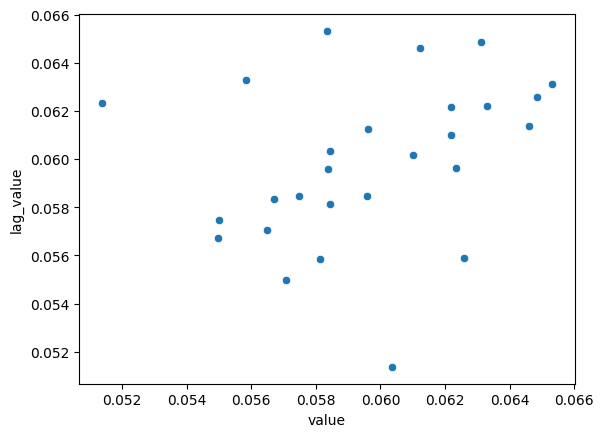

In [282]:
melted_conv1["lag_value"] = melted_conv1["value"].shift(3)

sns.scatterplot(x=melted_conv1["value"], y=melted_conv1["lag_value"])

In [206]:
melted_conv2 = melted_conv_pct_df[melted_conv_pct_df["conv"] == "conv2"].reset_index(drop=True)
melted_conv2["lag_value"] = melted_conv2["value"].shift(1)

melted_conv2.describe()

,day,value,lag_value
count,30.000000,30.000000,29.000000
mean,15.500000,0.105644,0.105594
std,8.803408,0.003334,0.003382
min,1.000000,0.100212,0.100212
25%,8.250000,0.102929,0.102858
50%,15.500000,0.105748,0.105702
75%,22.750000,0.107544,0.107558
max,30.000000,0.112003,0.112003


In [207]:
def assign_label2(val):
    if val >= 0.107544:
        return 3
    
    if val >= 0.105748:
        return 2
    
    if val >= 0.102929:
        return 1
    
    return 0

In [219]:
melted_conv2["label"] = melted_conv2["value"].apply(assign_label2)
melted_conv2["lag_label"] = melted_conv2["label"].shift(1)
melted_conv2["lag_label"].fillna(melted_conv2["label"], inplace=True)

melted_conv2["emb_num"] = (22256860 + melted_conv2["lag_label"]).astype(int)

In [241]:
melted_conv2

,day,conv,value,lag_value,label,lag_label,emb_num
0,1,conv2,0.105485,NaN,1,1.0,22256861
1,2,conv2,0.107243,0.105485,2,1.0,22256861
2,3,conv2,0.109435,0.107243,3,2.0,22256862
3,4,conv2,0.112003,0.109435,3,3.0,22256863
4,5,conv2,0.106662,0.112003,2,3.0,22256863
5,6,conv2,0.101706,0.106662,0,2.0,22256862
6,7,conv2,0.110220,0.101706,3,0.0,22256860
7,8,conv2,0.109984,0.110220,3,3.0,22256863
8,9,conv2,0.110714,0.109984,3,3.0,22256863
9,10,conv2,0.109406,0.110714,3,3.0,22256863


In [236]:
idx_map = {}

for idx, row in melted_conv2.iterrows():
    idx_map[row["day"]] = row["emb_num"]

In [237]:
idx_map

{1: 22256861,
 2: 22256861,
 3: 22256862,
 4: 22256863,
 5: 22256863,
 6: 22256862,
 7: 22256860,
 8: 22256863,
 9: 22256863,
 10: 22256863,
 11: 22256863,
 12: 22256861,
 13: 22256860,
 14: 22256860,
 15: 22256860,
 16: 22256861,
 17: 22256860,
 18: 22256860,
 19: 22256861,
 20: 22256862,
 21: 22256863,
 22: 22256862,
 23: 22256862,
 24: 22256863,
 25: 22256861,
 26: 22256860,
 27: 22256861,
 28: 22256862,
 29: 22256860,
 30: 22256861}

In [229]:
joblib.dump(idx_map, "./idx_map2.pkl")

['./idx_map2.pkl']

In [210]:
melted_conv2["label"].value_counts()

3    8
0    8
1    7
2    7
Name: label, dtype: int64

In [174]:
melted_conv3 = melted_conv_pct_df[melted_conv_pct_df["conv"] == "conv3"].reset_index(drop=True)
melted_conv3["lag_value"] = melted_conv3["value"].shift(1)

melted_conv3.describe()

,day,value,lag_value
count,30.000000,30.000000,29.000000
mean,15.500000,0.038681,0.038599
std,8.803408,0.002258,0.002252
min,1.000000,0.033612,0.033612
25%,8.250000,0.036995,0.036938
50%,15.500000,0.038395,0.038189
75%,22.750000,0.040541,0.040475
max,30.000000,0.042295,0.042295


In [193]:
def assign_label3(val):
    if val >= 0.040475:
        return 3
    
    if val >= 0.038189:
        return 2
    
    if val >= 0.036938:
        return 1
    
    return 0

In [221]:
melted_conv3["label"] = melted_conv3["value"].apply(assign_label3)
melted_conv3["lag_label"] = melted_conv3["label"].shift(1)
melted_conv3["lag_label"].fillna(melted_conv3["label"], inplace=True)

melted_conv3["emb_num"] = (34975980 + melted_conv3["lag_label"]).astype(int)

In [242]:
melted_conv3

,day,conv,value,lag_value,label,lag_label,emb_num
0,1,conv3,0.037164,NaN,1,1.0,34975981
1,2,conv3,0.039987,0.037164,2,1.0,34975981
2,3,conv3,0.037324,0.039987,1,2.0,34975982
3,4,conv3,0.036938,0.037324,1,1.0,34975981
4,5,conv3,0.035754,0.036938,0,1.0,34975981
5,6,conv3,0.038189,0.035754,1,0.0,34975980
6,7,conv3,0.040657,0.038189,3,1.0,34975981
7,8,conv3,0.036021,0.040657,0,3.0,34975983
8,9,conv3,0.035395,0.036021,0,0.0,34975980
9,10,conv3,0.033612,0.035395,0,0.0,34975980


In [238]:
idx_map = {}

for idx, row in melted_conv3.iterrows():
    idx_map[row["day"]] = row["emb_num"]

In [239]:
idx_map

{1: 34975981,
 2: 34975981,
 3: 34975982,
 4: 34975981,
 5: 34975981,
 6: 34975980,
 7: 34975981,
 8: 34975983,
 9: 34975980,
 10: 34975980,
 11: 34975980,
 12: 34975980,
 13: 34975980,
 14: 34975981,
 15: 34975981,
 16: 34975981,
 17: 34975983,
 18: 34975983,
 19: 34975982,
 20: 34975983,
 21: 34975982,
 22: 34975982,
 23: 34975982,
 24: 34975980,
 25: 34975981,
 26: 34975982,
 27: 34975983,
 28: 34975983,
 29: 34975983,
 30: 34975983}

In [233]:
joblib.dump(idx_map, "./idx_map3.pkl")

['./idx_map3.pkl']

In [7]:
records = {"dt": [], "pos1": [], "neg1": [], "pos2": [], "neg2": [], "pos3": [], "neg3": []}

for _file in tqdm.tqdm(train_file_ls):
    day = int(_file.split(".")[0][-2:])
    
    records["dt"].append(day)
    
    pos1, neg1, pos2, neg2, pos3, neg3 = 0, 0, 0, 0, 0, 0
            
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            if t1 == "0":
                neg1 += 1
            if t1 == "1":
                pos1 += 1
            
            if t2 == "0":
                neg2 += 1
            if t2 == "1":
                pos2 += 1
                
            if t3 == "0":
                neg3 += 1
            if t3 == "1":
                pos3 += 1
                
        records["pos1"].append(pos1)
        records["neg1"].append(neg1)
        records["pos2"].append(pos2)
        records["neg2"].append(neg2)
        records["pos3"].append(pos3)
        records["neg3"].append(neg3)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:38<00:00,  1.27s/it]


In [10]:
records_df = pd.DataFrame(records)
records_df

,dt,pos1,neg1,pos2,neg2,pos3,neg3
0,1,4037,68216,9805,83147,3126,80988
1,2,4103,64066,9682,80599,3136,75289
2,3,4153,63520,9359,76162,3354,86508
3,4,3989,59745,9403,74550,3493,91070
4,5,3801,58519,8740,73201,3624,97735
5,6,3918,56726,7504,66277,3216,80997
6,7,4266,61520,7337,59230,3246,76592
7,8,4337,65419,7501,60700,3220,86173
8,9,4535,69523,7069,56780,3813,103914
9,10,4287,63645,7206,58659,3493,100429


In [59]:
# records_df.to_csv("records_df.csv", index=False)

In [61]:
records_rolling3 = records_df[["pos1", "neg1", "pos2", "neg2", "pos3", "neg3"]].rolling(3).sum()

records_rolling3["conv1"] = records_rolling3["pos1"] / (records_rolling3["pos1"] + records_rolling3["neg1"])
records_rolling3["conv2"] = records_rolling3["pos2"] / (records_rolling3["pos2"] + records_rolling3["neg2"])
records_rolling3["conv3"] = records_rolling3["pos3"] / (records_rolling3["pos3"] + records_rolling3["neg3"])

records_rolling3

,pos1,neg1,pos2,neg2,pos3,neg3,conv1,conv2,conv3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12293.0,195802.0,28846.0,239908.0,9616.0,242785.0,0.059074,0.107332,0.038098
3,12245.0,187331.0,28444.0,231311.0,9983.0,252867.0,0.061355,0.109503,0.037980
4,11943.0,181784.0,27502.0,223913.0,10471.0,275313.0,0.061649,0.109389,0.036640
5,11708.0,174990.0,25647.0,214028.0,10333.0,269802.0,0.062711,0.107007,0.036886
6,11985.0,176765.0,23581.0,198708.0,10086.0,255324.0,0.063497,0.106083,0.038002
7,12521.0,183665.0,22342.0,186207.0,9682.0,243762.0,0.063822,0.107131,0.038202
8,13138.0,196462.0,21907.0,176710.0,10279.0,266679.0,0.062681,0.110298,0.037114
9,13159.0,198587.0,21776.0,176139.0,10526.0,290516.0,0.062145,0.110027,0.034965


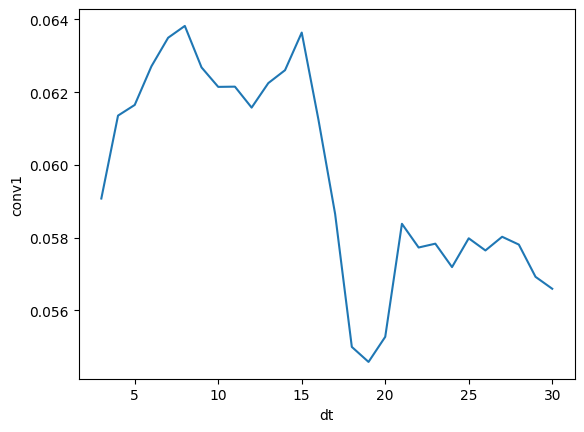

In [64]:
sns.lineplot(x=records_df["dt"], y=records_rolling3["conv1"]);

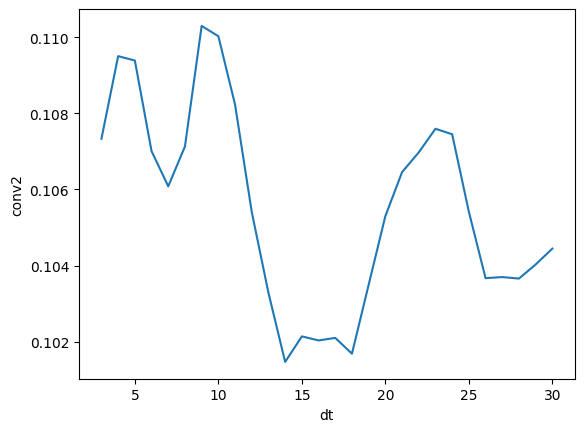

In [63]:
sns.lineplot(x=records_df["dt"], y=records_rolling3["conv2"]);

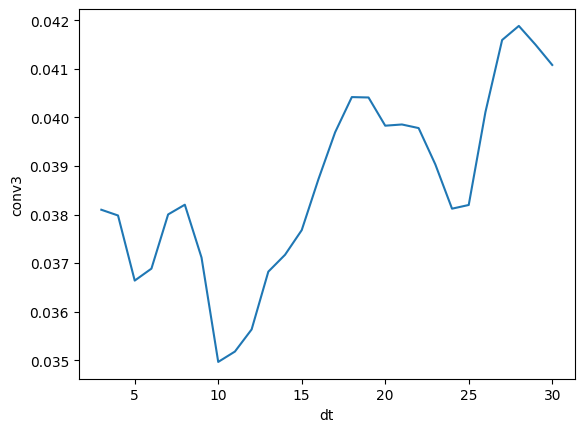

In [65]:
sns.lineplot(x=records_df["dt"], y=records_rolling3["conv3"]);

In [16]:
_map = {}

for _dt in range(1, 31):
    _map[f"day{_dt}"] = {}
    
    curr_df = records_df[records_df["dt"] >= _dt]
    
    pos1_sum = curr_df["pos1"].sum()
    neg1_sum = curr_df["neg1"].sum()
    
    pos2_sum = curr_df["pos2"].sum()
    neg2_sum = curr_df["neg2"].sum()
    
    pos3_sum = curr_df["pos3"].sum()
    neg3_sum = curr_df["neg3"].sum()
    
    conv1 = 100 * pos1_sum / (pos1_sum + neg1_sum)
    conv2 = 100 * pos2_sum / (pos2_sum + neg2_sum)
    conv3 = 100 * pos3_sum / (pos3_sum + neg3_sum)
    
    _map[f"day{_dt}"]["conv1"] = conv1 / (100 - conv1)
    _map[f"day{_dt}"]["conv2"] = conv2 / (100 - conv2)
    _map[f"day{_dt}"]["conv3"] = conv3 / (100 - conv3)
    
    print(f">= day {_dt}")
    print(f"conversion rate of type 1 = {conv1}")
    print(f"conversion rate of type 2 = {conv2}")
    print(f"conversion rate of type 3 = {conv3}")

>= day 1
conversion rate of type 1 = 5.928289400009392
conversion rate of type 2 = 10.561475374417741
conversion rate of type 3 = 3.859661757901048
>= day 2
conversion rate of type 1 = 5.939789433393315
conversion rate of type 2 = 10.562050156844027
conversion rate of type 3 = 3.8641370928121486
>= day 3
conversion rate of type 1 = 5.9371905352853656
conversion rate of type 2 = 10.554782033965923
conversion rate of type 3 = 3.860099920978127
>= day 4
conversion rate of type 1 = 5.930456078900638
conversion rate of type 2 = 10.537555064196004
conversion rate of type 3 = 3.864645702850823
>= day 5
conversion rate of type 1 = 5.9196834984009685
conversion rate of type 2 = 10.507411259914186
conversion rate of type 3 = 3.871292706583963
>= day 6
conversion rate of type 1 = 5.9137351834883605
conversion rate of type 2 = 10.500034299015987
conversion rate of type 3 = 3.884171389653031
>= day 7
conversion rate of type 1 = 5.895509060186012
conversion rate of type 2 = 10.514413786493014
conver

# 统计每一天三类广告总数

In [103]:
conv1_pct, conv2_pct, conv3_pct = [], [], []
conv1_conv, conv2_conv, conv3_conv = [], [], []

for day, conv_type in conv1_cnt.items():
    conv1 = conv_type["0"] + conv_type["1"]
    conv2 = conv2_cnt[day]["0"] + conv2_cnt[day]["1"]
    conv3 = conv3_cnt[day]["0"] + conv3_cnt[day]["1"]
    
    conv1_conv.append(conv_type["1"])
    conv2_conv.append(conv2_cnt[day]["1"])
    conv3_conv.append(conv3_cnt[day]["1"])
    
    conv_total = conv1 + conv2 + conv3
    
    conv1_pct.append(conv1)
    conv2_pct.append(conv2)
    conv3_pct.append(conv3)

In [104]:
conv_df = pd.DataFrame(
    {
        "day": range(1, 31),
        "conv1": conv1_pct,
        "conv2": conv2_pct,
        "conv3": conv3_pct
    }
)

conv_conv_df = pd.DataFrame(
    {
        "day": range(1, 31),
        "conv1": conv1_conv,
        "conv2": conv2_conv,
        "conv3": conv3_conv
    }
)

In [105]:
melted_conv_df = pd.melt(conv_df, id_vars=["day"], value_vars=["conv1", "conv2", "conv3"], var_name="conv")
melted_conv_df

,day,conv,value
0,1,conv1,72253
1,2,conv1,68169
2,3,conv1,67673
3,4,conv1,63734
4,5,conv1,62320
...,...,...,...
85,26,conv3,103747
86,27,conv3,92683
87,28,conv3,93118
88,29,conv3,86709


In [55]:
melted_conv_conv_df = pd.melt(conv_conv_df, id_vars=["day"], value_vars=["conv1", "conv2", "conv3"], var_name="conv")
melted_conv_conv_df

,day,conv,value
0,1,conv1,4037
1,2,conv1,4103
2,3,conv1,4153
3,4,conv1,3989
4,5,conv1,3801
...,...,...,...
85,26,conv3,4383
86,27,conv3,3920
87,28,conv3,3824
88,29,conv3,3564


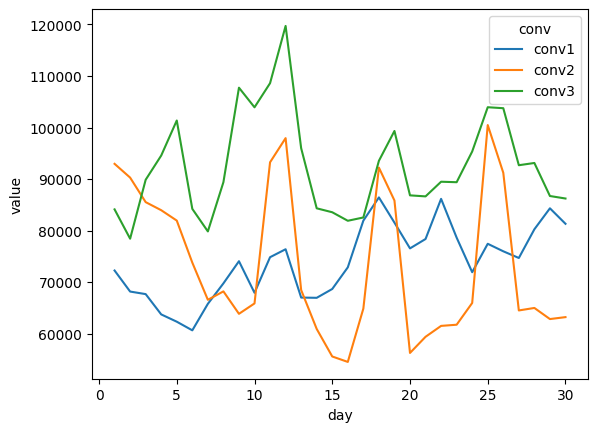

In [107]:
# 每类广告(不管转化与否)总数量
sns.lineplot(data=melted_conv_df, x="day", y="value", hue="conv");

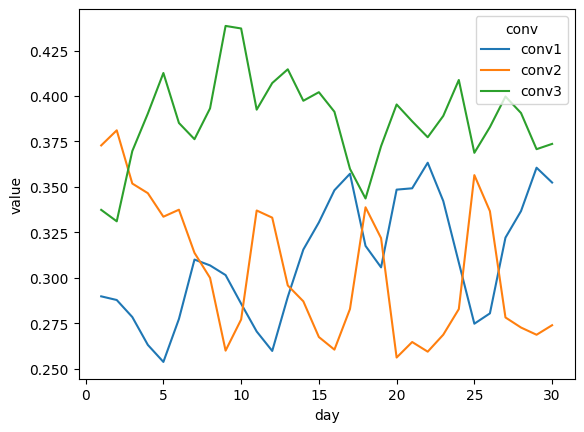

In [57]:
# 每类广告(不管转化与否)数量占比
sns.lineplot(data=melted_conv_df, x="day", y="value", hue="conv");

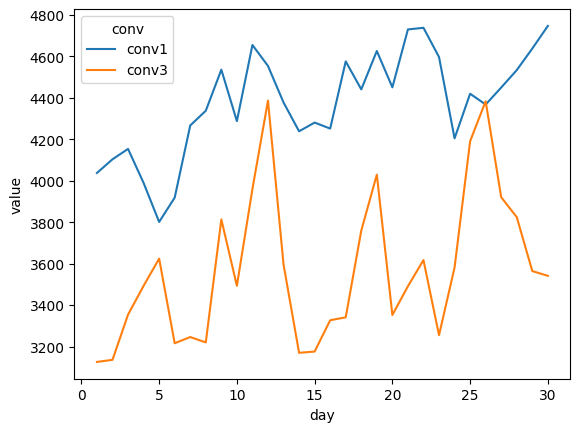

In [108]:
# 每类广告转化数量
sns.lineplot(data=melted_conv_conv_df[melted_conv_conv_df.conv.isin(["conv1", "conv2"])], x="day", y="value", hue="conv");

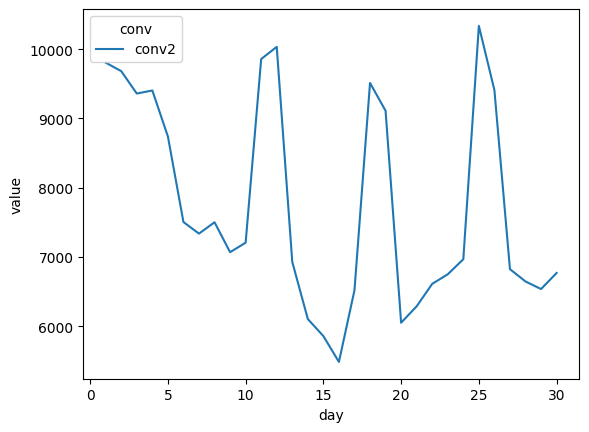

In [101]:
sns.lineplot(data=melted_conv_conv_df[melted_conv_conv_df.conv=="conv2"], x="day", y="value", hue="conv");

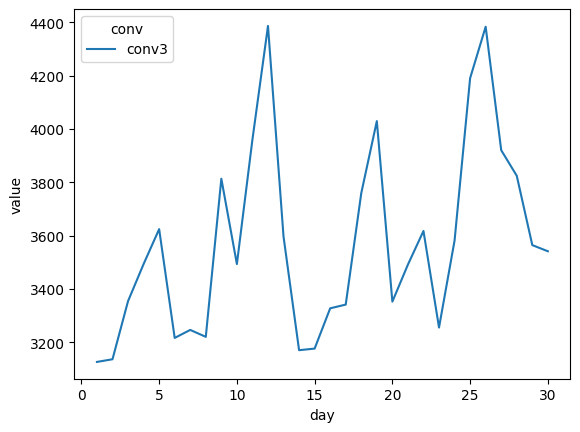

In [102]:
sns.lineplot(data=melted_conv_conv_df[melted_conv_conv_df.conv=="conv3"], x="day", y="value", hue="conv");

# 每一类广告中，各个id最后出现的时间

In [22]:
t1_id, t2_id, t3_id = {}, {}, {}

for _file in tqdm.tqdm(train_file_ls):
    day = int(_file.split(".")[0][-2:])
    
    with open(os.path.join(train_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            t1 = items[1]
            t2 = items[2]
            t3 = items[3]
            features = items[4]
            
            if t1 in ["0", "1"]:
                curr_ids = t1_id
            elif t2 in ["0", "1"]:
                curr_ids = t2_id
            elif t3 in ["0", "1"]:
                curr_ids = t3_id
            
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _value = _f.split(":")[0]
                
                latest = curr_ids.get(_value, day)
                curr_ids.update({_value: day})

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [10:10<00:00, 20.34s/it]


In [23]:
t1_day_cnt, t2_day_cnt, t3_day_cnt = {}, {}, {}

for _k, _v in t1_id.items():
    cnt = t1_day_cnt.get(_v, 0)
    t1_day_cnt.update({_v: cnt + 1})
    
for _k, _v in t2_id.items():
    cnt = t2_day_cnt.get(_v, 0)
    t2_day_cnt.update({_v: cnt + 1})
    
for _k, _v in t3_id.items():
    cnt = t3_day_cnt.get(_v, 0)
    t3_day_cnt.update({_v: cnt + 1})

In [28]:
len(t1_id), len(t2_id), len(t3_id)

(29603843, 21415190, 33617131)

In [39]:
t1_day_cnt_df =pd.DataFrame({"x": [i for i in range(1, 31)], "y": [t1_day_cnt[i] for i in range(1, 31)]})

t1_day_cnt_df["cumu_y"] = t1_day_cnt_df["y"].cumsum()
t1_day_cnt_df["cumu_pct"] = t1_day_cnt_df["cumu_y"] / len(t1_id)

t1_day_cnt_df

,x,y,cumu_y,cumu_pct
0,1,774520,774520,0.026163
1,2,765031,1539551,0.052005
2,3,762757,2302308,0.077771
3,4,746160,3048468,0.102975
4,5,727423,3775891,0.127547
5,6,721891,4497782,0.151932
6,7,790423,5288205,0.178632
7,8,832569,6120774,0.206756
8,9,878015,6998789,0.236415
9,10,822865,7821654,0.264211


In [40]:
t2_day_cnt_df =pd.DataFrame({"x": [i for i in range(1, 31)], "y": [t2_day_cnt[i] for i in range(1, 31)]})

t2_day_cnt_df["cumu_y"] = t2_day_cnt_df["y"].cumsum()
t2_day_cnt_df["cumu_pct"] = t2_day_cnt_df["cumu_y"] / len(t2_id)

t2_day_cnt_df

,x,y,cumu_y,cumu_pct
0,1,768417,768417,0.035882
1,2,746953,1515370,0.070761
2,3,708730,2224100,0.103856
3,4,701581,2925681,0.136617
4,5,698924,3624605,0.169254
5,6,625985,4250590,0.198485
6,7,558467,4809057,0.224563
7,8,571316,5380373,0.251241
8,9,532454,5912827,0.276104
9,10,555382,6468209,0.302038


In [41]:
t3_day_cnt_df =pd.DataFrame({"x": [i for i in range(1, 31)], "y": [t3_day_cnt[i] for i in range(1, 31)]})

t3_day_cnt_df["cumu_y"] = t3_day_cnt_df["y"].cumsum()
t3_day_cnt_df["cumu_pct"] = t3_day_cnt_df["cumu_y"] / len(t3_id)

t3_day_cnt_df

,x,y,cumu_y,cumu_pct
0,1,902729,902729,0.026853
1,2,845083,1747812,0.051992
2,3,951934,2699746,0.080309
3,4,1009836,3709582,0.110348
4,5,1123145,4832727,0.143758
5,6,923322,5756049,0.171224
6,7,838515,6594564,0.196167
7,8,943114,7537678,0.224221
8,9,1105991,8643669,0.257121
9,10,1088309,9731978,0.289495


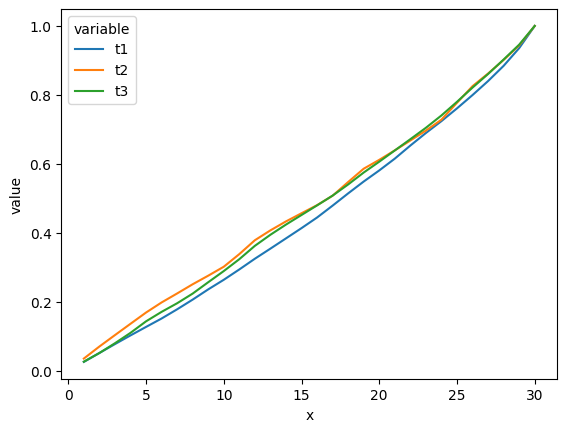

In [45]:
comp = pd.DataFrame(
    {
        "x": [i for i in range(1, 31)], 
        "t1": t1_day_cnt_df["cumu_pct"],
        "t2": t2_day_cnt_df["cumu_pct"],
        "t3": t3_day_cnt_df["cumu_pct"]
    }
)

melted_comp = comp.melt(id_vars=["x"], value_vars=["t1", "t2", "t3"])
sns.lineplot(melted_comp, x="x", y="value", hue="variable");

# 探索转化类型1

In [2]:
train_t1_folder = "../../work_data/data205411/2023-cvr-contest-data/train_t1"
train_t1_file_ls = os.listdir(train_t1_folder)

train_t1_file_ls

['file_t1.txt']

In [ ]:
t1_pos = []
t1_neg = []

for _file in train_t1_file_ls:
    with open(os.path.join(train_t1_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv1 = items[1]
            features = items[4]

            if conv1 == "0":
                curr_t1 = t1_neg
            elif conv1 == "1":
                curr_t1 = t1_pos

            curr_features = {}

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _key in ["12", "16"]:
                    continue

                if _key not in curr_features:
                    curr_features[_key] = []
                
                curr_features[_key].append(_value)
            
            curr_t1.append(curr_features)

In [ ]:
len(t1_pos), len(t1_neg)

## 统计序列长度类型

In [ ]:
t1_pos_len_cnt = {}
t1_neg_len_cnt = {}

for row in t1_pos:
    for _k, _v in row.items():
        if _k not in t1_pos_len_cnt:
            t1_pos_len_cnt[_k] = set()
        
        t1_pos_len_cnt[_k].add(len(_v))

In [ ]:
for row in t1_neg:
    for _k, _v in row.items():
        if _k not in t1_neg_len_cnt:
            t1_neg_len_cnt[_k] = set()
        
        t1_neg_len_cnt[_k].add(len(_v))

In [ ]:
dict(sorted(t1_pos_len_cnt.items()))

In [ ]:
dict(sorted(t1_neg_len_cnt.items()))

## 统计序列长度占比

In [ ]:
t1_pos_len_cnt_sum = {}

for row in t1_pos:
    for _k, _v in row.items():
        if _k not in ["10", "17", "18", "20", "21", "22", "25", "26"]:
            continue

        if _k not in t1_pos_len_cnt_sum:
            t1_pos_len_cnt_sum[_k] = {}

        curr_len = len(_v)

        if curr_len not in t1_pos_len_cnt_sum[_k]:
            t1_pos_len_cnt_sum[_k][curr_len] = 0
        
        t1_pos_len_cnt_sum[_k][curr_len] += 1

In [ ]:
for _k, _v in t1_pos_len_cnt_sum.items():
    t1_pos_len_cnt_sum[_k] = dict(sorted(_v.items()))

In [ ]:
t1_neg_len_cnt_sum = {}

for row in t1_neg:
    for _k, _v in row.items():
        if _k not in ["10", "17", "18", "20", "21", "22", "25", "26"]:
            continue

        if _k not in t1_neg_len_cnt_sum:
            t1_neg_len_cnt_sum[_k] = {}

        curr_len = len(_v)

        if curr_len not in t1_neg_len_cnt_sum[_k]:
            t1_neg_len_cnt_sum[_k][curr_len] = 0
        
        t1_neg_len_cnt_sum[_k][curr_len] += 1


for _k, _v in t1_neg_len_cnt_sum.items():
    t1_neg_len_cnt_sum[_k] = dict(sorted(_v.items()))

In [ ]:
for _k, _v in t1_pos_len_cnt_sum.items():
    cnt = 0

    for __k, __v in _v.items():
        cnt += __v
    
    t1_pos_len_cnt_sum[_k][0] = 131286 - cnt

    for __k, __v in _v.items():
        t1_pos_len_cnt_sum[_k][__k] = __v / 131286
    
    t1_pos_len_cnt_sum[_k] = dict(sorted(t1_pos_len_cnt_sum[_k].items()))

In [ ]:
for _k, _v in t1_neg_len_cnt_sum.items():
    cnt = 0

    for __k, __v in _v.items():
        cnt += __v
    
    t1_neg_len_cnt_sum[_k][0] = 2083282 - cnt

    for __k, __v in _v.items():
        t1_neg_len_cnt_sum[_k][__k] = __v / 2083282
    
    t1_neg_len_cnt_sum[_k] = dict(sorted(t1_neg_len_cnt_sum[_k].items()))

In [ ]:
t1_pos_len_cnt_sum["21"], t1_neg_len_cnt_sum["21"]

In [ ]:
t1_pos_len_cnt_sum["18"], t1_neg_len_cnt_sum["18"]

## 探索序列id规律

### 序列id交集

In [3]:
t1_pos_id = {}
t1_neg_id = {}


for _file in train_t1_file_ls:
    with open(os.path.join(train_t1_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv1 = items[1]
            features = items[4]

            if conv1 == "0":
                curr_t1 = t1_neg_id
            elif conv1 == "1":
                curr_t1 = t1_pos_id

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _key not in curr_t1:
                    curr_t1[_key] = set()

                curr_t1[_key].add(_value)

In [4]:
t1_intersections = {}
t1_pos_unique = {}
t1_neg_unique = {}

for _k, _v in t1_pos_id.items():
    if _k not in t1_intersections:
        t1_intersections[_k] = set()

    if _k not in t1_pos_unique:
        t1_pos_unique[_k] = set()

    if _k not in t1_neg_unique:
        t1_neg_unique[_k] = set()

    curr_intersection = t1_pos_id[_k].intersection(t1_neg_id[_k])
    t1_intersections[_k].update(curr_intersection)

    curr_pos_unique = t1_pos_id[_k] - curr_intersection
    t1_pos_unique[_k].update(curr_pos_unique)

    curr_neg_unique = t1_neg_id[_k] - curr_intersection
    t1_neg_unique[_k].update(curr_neg_unique)

In [5]:
for _k, _v in t1_intersections.items():
    print(f"[{_k}]: [pos]:{len(t1_pos_id[_k])}, [neg]:{len(t1_neg_id[_k])}, [inter]:{len(_v)}, [only in pos]:{len(t1_pos_unique[_k])}, [only in neg]:{len(t1_neg_unique[_k])}")

[1]: [pos]:7, [neg]:7, [inter]:7, [only in pos]:0, [only in neg]:0
[2]: [pos]:3, [neg]:3, [inter]:3, [only in pos]:0, [only in neg]:0
[3]: [pos]:130885, [neg]:2023011, [inter]:3483, [only in pos]:127402, [only in neg]:2019528
[4]: [pos]:121043, [neg]:1666503, [inter]:21848, [only in pos]:99195, [only in neg]:1644655
[5]: [pos]:4, [neg]:4, [inter]:4, [only in pos]:0, [only in neg]:0
[6]: [pos]:3, [neg]:3, [inter]:3, [only in pos]:0, [only in neg]:0
[7]: [pos]:6, [neg]:6, [inter]:6, [only in pos]:0, [only in neg]:0
[8]: [pos]:6, [neg]:6, [inter]:6, [only in pos]:0, [only in neg]:0
[9]: [pos]:2, [neg]:2, [inter]:2, [only in pos]:0, [only in neg]:0
[10]: [pos]:491361, [neg]:1988503, [inter]:421117, [only in pos]:70244, [only in neg]:1567386
[11]: [pos]:37, [neg]:37, [inter]:37, [only in pos]:0, [only in neg]:0
[13]: [pos]:24, [neg]:24, [inter]:24, [only in pos]:0, [only in neg]:0
[14]: [pos]:2, [neg]:2, [inter]:2, [only in pos]:0, [only in neg]:0
[15]: [pos]:153, [neg]:341, [inter]:148, [o

### 序列id频率

In [6]:
t1_pos_id_cnt = {}
t1_neg_id_cnt = {}

for _file in train_t1_file_ls:
    with open(os.path.join(train_t1_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv1 = items[1]
            features = items[4]

            if conv1 == "0":
                curr_t1 = t1_neg_id_cnt
            elif conv1 == "1":
                curr_t1 = t1_pos_id_cnt

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                cnt = curr_t1.get(_value, 0)
                curr_t1.update({_value: cnt + 1})

In [7]:
t1_pos_id_cnt_freq = {}

for _k, _v in t1_pos_id_cnt.items():
    cnt = t1_pos_id_cnt_freq.get(_v, 0)
    t1_pos_id_cnt_freq.update({_v: cnt + 1})

In [8]:
tmp = dict(sorted(t1_pos_id_cnt_freq.items()))

tmp_df = pd.DataFrame()
tmp_df["cnt"] = list(tmp.keys())
tmp_df["freq"] = list(tmp.values())

tmp_df["sum_freq"] = tmp_df["freq"].sum()
tmp_df["cum_freq"] = tmp_df["freq"].cumsum()

tmp_df["cum_pct"] = tmp_df["cum_freq"] / tmp_df["sum_freq"]

tmp_df

,cnt,freq,sum_freq,cum_freq,cum_pct
0,1,2669704,3234583,2669704,0.825363
1,2,272603,3234583,2942307,0.909640
2,3,100220,3234583,3042527,0.940624
3,4,52133,3234583,3094660,0.956742
4,5,31134,3234583,3125794,0.966367
...,...,...,...,...,...
1072,100071,1,3234583,3234579,0.999999
1073,112193,1,3234583,3234580,0.999999
1074,112207,1,3234583,3234581,0.999999
1075,130442,1,3234583,3234582,1.000000


In [9]:
t1_neg_id_cnt_freq = {}

for _k, _v in t1_neg_id_cnt.items():
    cnt = t1_neg_id_cnt_freq.get(_v, 0)
    t1_neg_id_cnt_freq.update({_v: cnt + 1})

In [10]:
tmp = dict(sorted(t1_neg_id_cnt_freq.items()))

tmp_df = pd.DataFrame()
tmp_df["cnt"] = list(tmp.keys())
tmp_df["freq"] = list(tmp.values())

tmp_df["sum_freq"] = tmp_df["freq"].sum()
tmp_df["cum_freq"] = tmp_df["freq"].cumsum()

tmp_df["cum_pct"] = tmp_df["cum_freq"] / tmp_df["sum_freq"]

In [11]:
tmp_df

,cnt,freq,sum_freq,cum_freq,cum_pct
0,1,21720115,28045356,21720115,0.774464
1,2,2755201,28045356,24475316,0.872705
2,3,1048362,28045356,25523678,0.910086
3,4,561048,28045356,26084726,0.930091
4,5,352925,28045356,26437651,0.942675
...,...,...,...,...,...
3993,1667953,1,28045356,28045352,1.000000
3994,1784404,1,28045356,28045353,1.000000
3995,1802758,1,28045356,28045354,1.000000
3996,2058004,1,28045356,28045355,1.000000


In [12]:
t1_pos_neglect_id = set([_k for _k, _v in t1_pos_id_cnt.items() if _v <= 1])
t1_neg_neglect_id = set([_k for _k, _v in t1_neg_id_cnt.items() if _v <= 2])

t1_neglect_id = t1_pos_neglect_id.union(t1_neg_neglect_id)

del t1_pos_neglect_id, t1_neg_neglect_id

In [13]:
len(t1_neglect_id)

26626164

In [14]:
test_t1_folder = "../../work_data/data204194/test_t1"
test_t1_file_ls = os.listdir(test_t1_folder)

test_t1_file_ls

['test_t1.txt']

In [15]:
test1_id = {}


for _file in test_t1_file_ls:
    with open(os.path.join(test_t1_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv1 = items[1]
            features = items[4]

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _key not in test1_id:
                    test1_id[_key] = set()

                test1_id[_key].add(_value)

In [16]:
test1_guess = {}

for _file in test_t1_file_ls:
    with open(os.path.join(test_t1_folder, _file), "r") as f:
        for idx, line in enumerate(f):
            test1_guess[idx] = []

            items = line.strip().split("\t")
            conv1 = items[1]
            features = items[4]

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _value in t1_pos_unique[_key] and _value not in t1_neglect_id:
                    test1_guess[idx].append(1)
                
                if _value in t1_neg_unique[_key] and _value not in t1_neglect_id:
                    test1_guess[idx].append(0)

In [17]:
test1_guess_cnt = {0: 0, 1: 0, 2: 0}

for _k, _v in test1_guess.items():
    curr_len = len(set(_v))
    test1_guess_cnt[curr_len] += 1

In [18]:
test1_guess_cnt

{0: 7126, 1: 72565, 2: 692}

In [19]:
test1_guess_len = {}

for _k, _v in test1_guess.items():
    curr_len = len(_v)
    curr_len_cnt = test1_guess_len.get(curr_len, 0)

    test1_guess_len.update({curr_len: curr_len_cnt + 1})

In [20]:
dict(sorted(test1_guess_len.items()))

{0: 7126,
 1: 6026,
 2: 7583,
 3: 7148,
 4: 7327,
 5: 6553,
 6: 6248,
 7: 5261,
 8: 4701,
 9: 3934,
 10: 3377,
 11: 2655,
 12: 2139,
 13: 1815,
 14: 1481,
 15: 1156,
 16: 1024,
 17: 822,
 18: 640,
 19: 529,
 20: 479,
 21: 352,
 22: 302,
 23: 260,
 24: 226,
 25: 176,
 26: 170,
 27: 126,
 28: 131,
 29: 111,
 30: 89,
 31: 70,
 32: 67,
 33: 52,
 34: 58,
 35: 39,
 36: 41,
 37: 21,
 38: 16,
 39: 18,
 40: 10,
 41: 7,
 42: 8,
 43: 5,
 44: 2,
 45: 2}

In [21]:
joblib.dump(test1_guess, "../cheat/t1/test1_guess.pkl")

['../cheat/t1/test1_guess.pkl']

# 探索转化类型2

In [22]:
train_t2_folder = "../../work_data/data205411/2023-cvr-contest-data/train_t2"
train_t2_file_ls = os.listdir(train_t2_folder)

train_t2_file_ls

['file_t2.txt']

In [23]:
t2_pos_id = {}
t2_neg_id = {}


for _file in train_t2_file_ls:
    with open(os.path.join(train_t2_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv = items[2]
            features = items[4]

            if conv == "0":
                curr_t2 = t2_neg_id
            elif conv == "1":
                curr_t2 = t2_pos_id

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _key not in curr_t2:
                    curr_t2[_key] = set()

                curr_t2[_key].add(_value)

In [24]:
t2_intersections = {}
t2_pos_unique = {}
t2_neg_unique = {}

for _k, _v in t2_pos_id.items():
    if _k not in t2_intersections:
        t2_intersections[_k] = set()

    if _k not in t2_pos_unique:
        t2_pos_unique[_k] = set()

    if _k not in t2_neg_unique:
        t2_neg_unique[_k] = set()

    curr_intersection = t2_pos_id[_k].intersection(t2_neg_id[_k])
    t2_intersections[_k].update(curr_intersection)

    curr_pos_unique = t2_pos_id[_k] - curr_intersection
    t2_pos_unique[_k].update(curr_pos_unique)

    curr_neg_unique = t2_neg_id[_k] - curr_intersection
    t2_neg_unique[_k].update(curr_neg_unique)

In [25]:
for _k, _v in t2_intersections.items():
    print(f"[{_k}]: [pos]:{len(t2_pos_id[_k])}, [neg]:{len(t2_neg_id[_k])}, [inter]:{len(_v)}, [only in pos]:{len(t2_pos_unique[_k])}, [only in neg]:{len(t2_neg_unique[_k])}")

[1]: [pos]:7, [neg]:7, [inter]:7, [only in pos]:0, [only in neg]:0
[2]: [pos]:3, [neg]:3, [inter]:3, [only in pos]:0, [only in neg]:0
[3]: [pos]:231537, [neg]:1889719, [inter]:5751, [only in pos]:225786, [only in neg]:1883968
[4]: [pos]:188719, [neg]:1343242, [inter]:23112, [only in pos]:165607, [only in neg]:1320130
[5]: [pos]:4, [neg]:4, [inter]:4, [only in pos]:0, [only in neg]:0
[6]: [pos]:3, [neg]:3, [inter]:3, [only in pos]:0, [only in neg]:0
[7]: [pos]:6, [neg]:6, [inter]:6, [only in pos]:0, [only in neg]:0
[8]: [pos]:6, [neg]:6, [inter]:6, [only in pos]:0, [only in neg]:0
[9]: [pos]:2, [neg]:2, [inter]:2, [only in pos]:0, [only in neg]:0
[10]: [pos]:423630, [neg]:1281774, [inter]:344417, [only in pos]:79213, [only in neg]:937357
[11]: [pos]:37, [neg]:37, [inter]:37, [only in pos]:0, [only in neg]:0
[13]: [pos]:24, [neg]:24, [inter]:24, [only in pos]:0, [only in neg]:0
[14]: [pos]:2, [neg]:2, [inter]:2, [only in pos]:0, [only in neg]:0
[15]: [pos]:205, [neg]:389, [inter]:196, [o

In [26]:
t2_pos_id_cnt = {}
t2_neg_id_cnt = {}

for _file in train_t2_file_ls:
    with open(os.path.join(train_t2_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv = items[2]
            features = items[4]

            if conv == "0":
                curr_t2 = t2_neg_id_cnt
            elif conv == "1":
                curr_t2 = t2_pos_id_cnt

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                cnt = curr_t2.get(_value, 0)
                curr_t2.update({_value: cnt + 1})

In [27]:
t2_pos_id_cnt_freq = {}

for _k, _v in t2_pos_id_cnt.items():
    cnt = t2_pos_id_cnt_freq.get(_v, 0)
    t2_pos_id_cnt_freq.update({_v: cnt + 1})

In [28]:
tmp = dict(sorted(t2_pos_id_cnt_freq.items()))

tmp_df = pd.DataFrame()
tmp_df["cnt"] = list(tmp.keys())
tmp_df["freq"] = list(tmp.values())

tmp_df["sum_freq"] = tmp_df["freq"].sum()
tmp_df["cum_freq"] = tmp_df["freq"].cumsum()

tmp_df["cum_pct"] = tmp_df["cum_freq"] / tmp_df["sum_freq"]

tmp_df

,cnt,freq,sum_freq,cum_freq,cum_pct
0,1,2938497,3704046,2938497,0.793321
1,2,335306,3704046,3273803,0.883845
2,3,129618,3704046,3403421,0.918839
3,4,69954,3704046,3473375,0.937725
4,5,43523,3704046,3516898,0.949475
...,...,...,...,...,...
1443,186632,1,3704046,3704042,0.999999
1444,189759,1,3704046,3704043,0.999999
1445,219579,1,3704046,3704044,0.999999
1446,230720,1,3704046,3704045,1.000000


In [29]:
t2_neg_id_cnt_freq = {}

for _k, _v in t2_neg_id_cnt.items():
    cnt = t2_neg_id_cnt_freq.get(_v, 0)
    t2_neg_id_cnt_freq.update({_v: cnt + 1})

In [30]:
tmp = dict(sorted(t2_neg_id_cnt_freq.items()))

tmp_df = pd.DataFrame()
tmp_df["cnt"] = list(tmp.keys())
tmp_df["freq"] = list(tmp.values())

tmp_df["sum_freq"] = tmp_df["freq"].sum()
tmp_df["cum_freq"] = tmp_df["freq"].cumsum()

tmp_df["cum_pct"] = tmp_df["cum_freq"] / tmp_df["sum_freq"]

In [31]:
tmp_df

,cnt,freq,sum_freq,cum_freq,cum_pct
0,1,14877231,19517026,14877231,0.762269
1,2,1957483,19517026,16834714,0.862566
2,3,749825,19517026,17584539,0.900985
3,4,405555,19517026,17990094,0.921764
4,5,256938,19517026,18247032,0.934929
...,...,...,...,...,...
4305,1649642,1,19517026,19517022,1.000000
4306,1680991,1,19517026,19517023,1.000000
4307,1775766,1,19517026,19517024,1.000000
4308,1936741,1,19517026,19517025,1.000000


In [32]:
t2_pos_neglect_id = set([_k for _k, _v in t2_pos_id_cnt.items() if _v <= 2])
t2_neg_neglect_id = set([_k for _k, _v in t2_neg_id_cnt.items() if _v <= 2])

t2_neglect_id = t2_pos_neglect_id.union(t2_neg_neglect_id)

del t2_pos_neglect_id, t2_neg_neglect_id

In [33]:
len(t2_neglect_id)

19467325

In [34]:
test_t2_folder = "../../work_data/data204194/test_t2"
test_t2_file_ls = os.listdir(test_t2_folder)

test_t2_file_ls

['test_t2.txt']

In [35]:
test2_id = {}

for _file in test_t2_file_ls:
    with open(os.path.join(test_t2_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv = items[2]
            features = items[4]

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _key not in test2_id:
                    test2_id[_key] = set()

                test2_id[_key].add(_value)

In [37]:
test2_guess = {}

for _file in test_t2_file_ls:
    with open(os.path.join(test_t2_folder, _file), "r") as f:
        for idx, line in enumerate(f):
            test2_guess[idx] = []

            items = line.strip().split("\t")
            conv = items[2]
            features = items[4]

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _value in t2_pos_unique[_key] and _value not in t2_neglect_id:
                    test2_guess[idx].append(1)
                
                if _value in t2_neg_unique[_key] and _value not in t2_neglect_id:
                    test2_guess[idx].append(0)

In [38]:
test2_guess_cnt = {0: 0, 1: 0, 2: 0}

for _k, _v in test2_guess.items():
    curr_len = len(set(_v))
    test2_guess_cnt[curr_len] += 1

In [39]:
test2_guess_cnt

{0: 14325, 1: 55157, 2: 177}

In [40]:
test2_guess_len = {}

for _k, _v in test2_guess.items():
    curr_len = len(_v)

    if curr_len not in test2_guess_len:
        test2_guess_len[curr_len] = 0
    
    test2_guess_len[curr_len] += 1

In [42]:
joblib.dump(test2_guess, "../cheat/t2/test2_guess.pkl")

['../cheat/t2/test2_guess.pkl']

# 探索转化类型3

In [43]:
train_t3_folder = "../../work_data/data205411/2023-cvr-contest-data/train_t3"
train_t3_file_ls = os.listdir(train_t3_folder)

train_t3_file_ls

['file_t3.txt']

In [44]:
t3_pos_id = {}
t3_neg_id = {}


for _file in train_t3_file_ls:
    with open(os.path.join(train_t3_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv = items[3]
            features = items[4]

            if conv == "0":
                curr_t3 = t3_neg_id
            elif conv == "1":
                curr_t3 = t3_pos_id

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _key not in curr_t3:
                    curr_t3[_key] = set()

                curr_t3[_key].add(_value)

In [45]:
t3_intersections = {}
t3_pos_unique = {}
t3_neg_unique = {}

for _k, _v in t3_pos_id.items():
    if _k not in t3_intersections:
        t3_intersections[_k] = set()

    if _k not in t3_pos_unique:
        t3_pos_unique[_k] = set()

    if _k not in t3_neg_unique:
        t3_neg_unique[_k] = set()

    curr_intersection = t3_pos_id[_k].intersection(t3_neg_id[_k])
    t3_intersections[_k].update(curr_intersection)

    curr_pos_unique = t3_pos_id[_k] - curr_intersection
    t3_pos_unique[_k].update(curr_pos_unique)

    curr_neg_unique = t3_neg_id[_k] - curr_intersection
    t3_neg_unique[_k].update(curr_neg_unique)

In [46]:
for _k, _v in t3_intersections.items():
    print(f"[{_k}]: [pos]:{len(t3_pos_id[_k])}, [neg]:{len(t3_neg_id[_k])}, [inter]:{len(_v)}, [only in pos]:{len(t3_pos_unique[_k])}, [only in neg]:{len(t3_neg_unique[_k])}")

[1]: [pos]:7, [neg]:7, [inter]:7, [only in pos]:0, [only in neg]:0
[2]: [pos]:3, [neg]:3, [inter]:3, [only in pos]:0, [only in neg]:0
[3]: [pos]:107073, [neg]:2588712, [inter]:4339, [only in pos]:102734, [only in neg]:2584373
[4]: [pos]:101817, [neg]:1987662, [inter]:37819, [only in pos]:63998, [only in neg]:1949843
[5]: [pos]:4, [neg]:4, [inter]:4, [only in pos]:0, [only in neg]:0
[6]: [pos]:3, [neg]:3, [inter]:3, [only in pos]:0, [only in neg]:0
[7]: [pos]:6, [neg]:6, [inter]:6, [only in pos]:0, [only in neg]:0
[8]: [pos]:6, [neg]:6, [inter]:6, [only in pos]:0, [only in neg]:0
[9]: [pos]:2, [neg]:2, [inter]:2, [only in pos]:0, [only in neg]:0
[10]: [pos]:352816, [neg]:2555613, [inter]:309134, [only in pos]:43682, [only in neg]:2246479
[11]: [pos]:37, [neg]:37, [inter]:37, [only in pos]:0, [only in neg]:0
[13]: [pos]:24, [neg]:24, [inter]:24, [only in pos]:0, [only in neg]:0
[14]: [pos]:2, [neg]:2, [inter]:2, [only in pos]:0, [only in neg]:0
[15]: [pos]:156, [neg]:363, [inter]:151, [o

In [47]:
t3_pos_id_cnt = {}
t3_neg_id_cnt = {}

for _file in train_t3_file_ls:
    with open(os.path.join(train_t3_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv = items[3]
            features = items[4]

            if conv == "0":
                curr_t3 = t3_neg_id_cnt
            elif conv == "1":
                curr_t3 = t3_pos_id_cnt

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                cnt = curr_t3.get(_value, 0)
                curr_t3.update({_value: cnt + 1})

In [48]:
t3_pos_id_cnt_freq = {}

for _k, _v in t3_pos_id_cnt.items():
    cnt = t3_pos_id_cnt_freq.get(_v, 0)
    t3_pos_id_cnt_freq.update({_v: cnt + 1})

In [49]:
tmp = dict(sorted(t3_pos_id_cnt_freq.items()))

tmp_df = pd.DataFrame()
tmp_df["cnt"] = list(tmp.keys())
tmp_df["freq"] = list(tmp.values())

tmp_df["sum_freq"] = tmp_df["freq"].sum()
tmp_df["cum_freq"] = tmp_df["freq"].cumsum()

tmp_df["cum_pct"] = tmp_df["cum_freq"] / tmp_df["sum_freq"]

tmp_df

,cnt,freq,sum_freq,cum_freq,cum_pct
0,1,1971743,2375312,1971743,0.830099
1,2,195086,2375312,2166829,0.912229
2,3,70976,2375312,2237805,0.942110
3,4,36227,2375312,2274032,0.957361
4,5,21735,2375312,2295767,0.966512
...,...,...,...,...,...
1009,88201,1,2375312,2375308,0.999998
1010,96686,1,2375312,2375309,0.999999
1011,97818,1,2375312,2375310,0.999999
1012,106390,1,2375312,2375311,1.000000


In [50]:
t3_neg_id_cnt_freq = {}

for _k, _v in t3_neg_id_cnt.items():
    cnt = t3_neg_id_cnt_freq.get(_v, 0)
    t3_neg_id_cnt_freq.update({_v: cnt + 1})

In [51]:
tmp = dict(sorted(t3_neg_id_cnt_freq.items()))

tmp_df = pd.DataFrame()
tmp_df["cnt"] = list(tmp.keys())
tmp_df["freq"] = list(tmp.values())

tmp_df["sum_freq"] = tmp_df["freq"].sum()
tmp_df["cum_freq"] = tmp_df["freq"].cumsum()

tmp_df["cum_pct"] = tmp_df["cum_freq"] / tmp_df["sum_freq"]

In [52]:
tmp_df

,cnt,freq,sum_freq,cum_freq,cum_pct
0,1,25090495,32648634,25090495,0.768501
1,2,3348446,32648634,28438941,0.871061
2,3,1266335,32648634,29705276,0.909847
3,4,667780,32648634,30373056,0.930301
4,5,414414,32648634,30787470,0.942994
...,...,...,...,...,...
4690,2288638,1,32648634,32648630,1.000000
4691,2359080,1,32648634,32648631,1.000000
4692,2475925,1,32648634,32648632,1.000000
4693,2640081,1,32648634,32648633,1.000000


In [53]:
t3_pos_neglect_id = set([_k for _k, _v in t3_pos_id_cnt.items() if _v <= 1])
t3_neg_neglect_id = set([_k for _k, _v in t3_neg_id_cnt.items() if _v <= 2])

t3_neglect_id = t3_pos_neglect_id.union(t3_neg_neglect_id)

del t3_pos_neglect_id, t3_neg_neglect_id

In [54]:
len(t3_neglect_id)

30023937

In [55]:
test_t3_folder = "../../work_data/data204194/test_t3"
test_t3_file_ls = os.listdir(test_t3_folder)

test_t3_file_ls

['test_t3.txt']

In [56]:
test3_id = {}

for _file in test_t3_file_ls:
    with open(os.path.join(test_t3_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            conv = items[3]
            features = items[4]

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _key not in test3_id:
                    test3_id[_key] = set()

                test3_id[_key].add(_value)

In [57]:
test3_guess = {}

for _file in test_t3_file_ls:
    with open(os.path.join(test_t3_folder, _file), "r") as f:
        for idx, line in enumerate(f):
            test3_guess[idx] = []

            items = line.strip().split("\t")
            conv = items[3]
            features = items[4]

            feature_ls = features.split(" ")

            for feature in feature_ls:
                _value, _key = feature.split(":")

                if _value in t3_pos_unique[_key] and _value not in t3_neglect_id:
                    test3_guess[idx].append(1)
                
                if _value in t3_neg_unique[_key] and _value not in t3_neglect_id:
                    test3_guess[idx].append(0)

In [58]:
test3_guess_cnt = {0: 0, 1: 0, 2: 0}

for _k, _v in test3_guess.items():
    curr_len = len(set(_v))
    test3_guess_cnt[curr_len] += 1

In [59]:
test3_guess_cnt

{0: 4676, 1: 79936, 2: 258}

In [60]:
test3_guess_len = {}

for _k, _v in test3_guess.items():
    curr_len = len(_v)

    if curr_len not in test3_guess_len:
        test3_guess_len[curr_len] = 0
    
    test3_guess_len[curr_len] += 1

In [62]:
joblib.dump(test3_guess, "../cheat/t3/test3_guess.pkl")

['../cheat/t3/test3_guess.pkl']

# 根据序列id值调整预测值

In [6]:
test_folder = "../../data/data204194/test_data"

test_records = {"log_key": [], "ad_type": []}

for _file in os.listdir(test_folder):
    with open(os.path.join(test_folder, _file), "r") as f:
        for line in f:
            items = line.strip().split("\t")
            
            log_key = items[0]
            test_records["log_key"].append(log_key)
            
            features = items[4]
            feature_ls = features.split(" ")
            
            for _f in feature_ls:
                _key = _f.split(":")[1]
                
                if _key != "9":
                    continue

                _value = _f.split(":")[0]
                
                if _value in ['2367', '321']:
                    test_records["ad_type"].append(1)
                elif _value in ['167', '350']:
                    test_records["ad_type"].append(2)
                elif _value in ['75', '9']:
                    test_records["ad_type"].append(3)


test_df = pd.DataFrame(test_records)

In [7]:
test_df.head()

,log_key,ad_type
0,11116664971,3
1,3932004506,3
2,510184597,3
3,2381591187,2
4,2018401937,1


In [69]:
_map = {
    "1": 3 * 5.928 / (100 - 5.928),
    "2": 3 * 10.561 / (100 - 10.561),
    "3": 3 * 3.86 / (100 - 3.86)
}

In [70]:
test_df["coef"] = test_df["ad_type"].apply(lambda x: _map[str(x)])

In [8]:
test_df

,log_key,ad_type
0,11116664971,3
1,3932004506,3
2,510184597,3
3,2381591187,2
4,2018401937,1
...,...,...
234907,2555842692,3
234908,1507859741,1
234909,1581235964,2
234910,2970014260,1


In [3]:
infer = pd.read_csv("./infer.csv")

In [4]:
infer.describe()

,t1,t2,t3
count,2.349120e+05,2.349120e+05,2.349120e+05
mean,4.728325e-06,1.128949e-02,1.153753e-05
std,8.934747e-05,8.956777e-02,2.175352e-04
min,0.000000e+00,6.550264e-22,3.738692e-25
25%,4.427549e-19,1.452983e-10,2.603805e-11
50%,5.014304e-14,4.358152e-09,1.424576e-09
75%,8.217532e-11,1.018592e-06,6.948752e-08
max,1.294672e-02,1.000000e+00,2.792864e-02


In [9]:
test_df["t1"] = infer["t1"]
test_df["t2"] = infer["t2"]
test_df["t3"] = infer["t3"]

In [10]:
def identify_pred(row):
    if row["ad_type"] == 1:
        return row["t1"]
    
    if row["ad_type"] == 2:
        return row["t2"]
    
    return row["t3"]

test_df["pred"] = test_df.apply(lambda x: identify_pred(x), axis=1)

In [11]:
def identify_max(row):
    if row["t1"] > max(row["t2"], row["t3"]):
        return 1
    elif row["t3"] > max(row["t2"], row["t1"]):
        return 3
    elif row["t2"] > max(row["t3"], row["t1"]):
        return 2

In [12]:
test_df["max_ad"] = test_df.apply(identify_max, axis=1)

In [13]:
test_df.tail(10)

,log_key,ad_type,t1,t2,t3,pred,max_ad
234902,2857176884,2,6.958546e-06,4.919986e-03,2.332751e-06,4.919986e-03,2
234903,1832180583,3,3.460030e-27,3.916679e-11,5.327411e-14,5.327411e-14,2
234904,657112804,3,2.963199e-15,5.573701e-08,2.225444e-07,2.225444e-07,3
234905,2970182928,3,5.086989e-15,5.220130e-09,1.066938e-08,1.066938e-08,3
234906,255919424,1,1.728782e-14,2.469664e-10,8.156655e-09,1.728782e-14,3
234907,2555842692,3,1.048623e-23,4.573931e-10,4.986838e-11,4.986838e-11,2
234908,1507859741,1,3.503784e-06,1.425230e-07,9.206045e-07,3.503784e-06,1
234909,1581235964,2,1.649192e-08,3.071749e-05,6.136316e-06,3.071749e-05,2
234910,2970014260,1,4.793100e-10,1.315296e-10,9.596852e-10,4.793100e-10,3
234911,2667557855,3,3.112461e-23,2.904437e-09,5.946687e-09,5.946687e-09,3


In [14]:
test_df.describe()

,ad_type,t1,t2,t3,pred,max_ad
count,234912.000000,2.349120e+05,2.349120e+05,2.349120e+05,2.349120e+05,234912.000000
mean,2.019101,4.728325e-06,1.128949e-02,1.153753e-05,1.129018e-02,2.272102
std,0.838514,8.934747e-05,8.956777e-02,2.175352e-04,8.956769e-02,0.532383
min,1.000000,0.000000e+00,6.550264e-22,3.738692e-25,1.376319e-30,1.000000
25%,1.000000,4.427549e-19,1.452983e-10,2.603805e-11,3.588475e-12,2.000000
50%,2.000000,5.014304e-14,4.358152e-09,1.424576e-09,2.107730e-09,2.000000
75%,3.000000,8.217532e-11,1.018592e-06,6.948752e-08,1.169588e-06,3.000000
max,3.000000,1.294672e-02,1.000000e+00,2.792864e-02,1.000000e+00,3.000000


In [ ]:
test_df["adjusted_pred"] = test_df.apply(lambda x: x["pred"] / (x["pred"] + (1-x["pred"]) / x["coef"]), axis=1)

In [64]:
test_df["adjusted_pred"].describe()

count    2.349120e+05
mean     1.561311e-01
std      2.796613e-01
min      4.712978e-12
25%      1.438507e-03
50%      1.821443e-02
75%      1.399831e-01
max      1.000000e+00
Name: adjusted_pred, dtype: float64

In [22]:
test_df[["log_key", "adjusted_pred"]].to_csv("./test-1.txt", index=False, header=False)

In [45]:
ref_id = pd.read_csv("./ref_id.txt", names=["log_key", "pred"])

In [46]:
ref_id

,log_key,pred
0,1116664971,0.033957
1,3932004506,0.063012
2,510184597,0.026179
3,2381591187,0.075692
4,2018401937,0.060653
...,...,...
234907,2555842692,0.030675
234908,1507859741,0.002907
234909,1581235964,0.013817
234910,2970014260,0.001035


In [50]:
test_df.groupby("ad_type").size()

ad_type
1    80383
2    69659
3    84870
dtype: int64

In [51]:
test_df["ref_pred"] = ref_id["pred"]

In [29]:
ref_id["pred"] = test_df["adjusted_pred"]

In [30]:
ref_id.to_csv("./test-1.txt", index=False, header=False)

In [36]:
infer0 = pd.read_csv("../../../test.txt", names=["log_key", "pred"], dtype={"log_key": str})
infer1 = pd.read_csv("../../../test-1.txt", names=["log_key", "pred"], dtype={"log_key": str})

In [37]:
infer0.describe()

,pred
count,234912.000000
mean,0.067311
std,0.065843
min,0.000000
25%,0.028012
50%,0.047572
75%,0.082649
max,0.580343


In [38]:
infer1.describe()

,pred
count,234912.000000
mean,0.189248
std,0.118152
min,0.001156
25%,0.103003
50%,0.167881
75%,0.253414
max,0.795004


In [39]:
tmp = pd.DataFrame()

In [40]:
tmp["log_key"] = infer0["log_key"]
tmp["ad_type"] = test_df["ad_type"]
tmp["pred"] = infer1["pred"]

In [29]:
test_df["pred"] = infer["pred"]

In [42]:
tmp["coef"] = tmp["ad_type"].apply(lambda x: {"1": 12/47, "2": 4/9, "3": 1/6}[str(x)])

In [43]:
tmp["adjusted_pred"] = tmp.apply(lambda x: x["pred"] / (x["pred"] + (1-x["pred"]) / x["coef"]), axis=1)

In [44]:
tmp.describe()

,ad_type,pred,coef,adjusted_pred
count,234912.000000,234912.000000,234912.000000,234912.000000
mean,2.019101,0.189248,0.279372,0.065233
std,0.838514,0.118152,0.113435,0.063073
min,1.000000,0.001156,0.166667,0.000295
25%,1.000000,0.103003,0.166667,0.027075
50%,2.000000,0.167881,0.255319,0.045030
75%,3.000000,0.253414,0.444444,0.079286
max,3.000000,0.795004,0.444444,0.632842


In [4]:
infer1 = pd.read_csv("../infer_1.csv")
infer2 = pd.read_csv("../infer_2.csv")
infer3 = pd.read_csv("../infer_3.csv")

In [12]:
test1_guess = joblib.load("../cheat/t1/test1_guess.pkl")
test2_guess = joblib.load("../cheat/t2/test2_guess.pkl")
test3_guess = joblib.load("../cheat/t3/test3_guess.pkl")

In [68]:
guess1, guess2, guess3 = [], [], []

for _idx, _ls in test1_guess.items():
    if len(set(_ls)) == 1 and len(_ls) > 15:
        guess1.append(_ls[0])
    else:
        guess1.append(-1)

for _idx, _ls in test2_guess.items():
    if len(set(_ls)) == 1 and len(_ls) > 15:
        guess2.append(_ls[0])
    else:
        guess2.append(-1)

for _idx, _ls in test3_guess.items():
    if len(set(_ls)) == 1 and len(_ls) > 15:
        guess3.append(_ls[0])
    else:
        guess3.append(-1)

In [69]:
infer1["guess"] = guess1
infer2["guess"] = guess2
infer3["guess"] = guess3

In [34]:
infer1.describe()

,pred,guess
count,80383.000000,80383.000000
mean,0.057288,-0.522586
std,0.050446,0.499543
min,0.000314,-1.000000
25%,0.018613,-1.000000
50%,0.044075,-1.000000
75%,0.080762,0.000000
max,0.436369,1.000000


In [35]:
infer2.describe()

,pred,guess
count,69659.000000,69659.000000
mean,0.108945,-0.765228
std,0.090318,0.423893
min,0.001275,-1.000000
25%,0.044262,-1.000000
50%,0.077906,-1.000000
75%,0.146845,-1.000000
max,0.580343,1.000000


In [36]:
infer3.describe()

,pred,guess
count,84870.000000,84870.000000
mean,0.045225,-0.507388
std,0.025381,0.499948
min,0.002234,-1.000000
25%,0.028246,-1.000000
50%,0.039628,-1.000000
75%,0.055534,0.000000
max,0.301820,0.000000


In [70]:
test_df.loc[test_df.ad_type==1, "pred"] = infer1["pred"].values
test_df.loc[test_df.ad_type==2, "pred"] = infer2["pred"].values
test_df.loc[test_df.ad_type==3, "pred"] = infer3["pred"].values

test_df.loc[test_df.ad_type==1, "guess"] = infer1["guess"].values
test_df.loc[test_df.ad_type==2, "guess"] = infer2["guess"].values
test_df.loc[test_df.ad_type==3, "guess"] = infer3["guess"].values

In [71]:
def adjust(row):
    if row["guess"] == -1:
        return row["pred"]
    return row["guess"]


test_df["adjusted_pred"] = test_df.apply(adjust, axis=1)

In [72]:
test_df.describe()

,ad_type,pred,guess,adjusted_pred
count,234912.000000,234912.000000,234912.000000,234912.000000
mean,2.019101,0.068248,-0.959168,0.067311
std,0.838514,0.065162,0.197902,0.065843
min,1.000000,0.000314,-1.000000,0.000000
25%,1.000000,0.028882,-1.000000,0.028012
50%,2.000000,0.047938,-1.000000,0.047572
75%,3.000000,0.082836,-1.000000,0.082649
max,3.000000,0.580343,0.000000,0.580343


In [47]:
tmp[["log_key", "adjusted_pred"]].to_csv("../../../test-1.txt", index=False, header=False)

In [ ]:
"""
[1] -- conv1: 7; 	conv2: 7; 	conv3: 7; 	duplicated: 0
[2] -- conv1: 3; 	conv2: 3; 	conv3: 3; 	duplicated: 0
[3] -- conv1: 2150413; 	conv2: 2115505; 	conv3: 2691446; 	duplicated: 0
[4] -- conv1: 1765698; 	conv2: 1508849; 	conv3: 2051660; 	duplicated: 0
[5] -- conv1: 4; 	conv2: 4; 	conv3: 4; 	duplicated: 0
[6] -- conv1: 3; 	conv2: 3; 	conv3: 3; 	duplicated: 0
[7] -- conv1: 6; 	conv2: 6; 	conv3: 6; 	duplicated: 6
[8] -- conv1: 6; 	conv2: 6; 	conv3: 6; 	duplicated: 0
[9] -- conv1: 2; 	conv2: 2; 	conv3: 2; 	duplicated: 0
[10] -- conv1: 2058747; 	conv2: 1360987; 	conv3: 2599295; 	duplicated: 52
[11] -- conv1: 37; 	conv2: 37; 	conv3: 37; 	duplicated: 0
[12] -- conv1: 0; 	conv2: 0; 	conv3: 0; 	duplicated: 0
[13] -- conv1: 24; 	conv2: 24; 	conv3: 24; 	duplicated: 24
[14] -- conv1: 2; 	conv2: 2; 	conv3: 2; 	duplicated: 0
[15] -- conv1: 346; 	conv2: 398; 	conv3: 368; 	duplicated: 0
[16] -- conv1: 1; 	conv2: 1; 	conv3: 1; 	duplicated: 1
[17] -- conv1: 6565679; 	conv2: 2944406; 	conv3: 8161049; 	duplicated: 0
[18] -- conv1: 1733638; 	conv2: 574389; 	conv3: 1057223; 	duplicated: 5079
[19] -- conv1: 98891; 	conv2: 96438; 	conv3: 174708; 	duplicated: 0
[20] -- conv1: 15419; 	conv2: 13502; 	conv3: 14936; 	duplicated: 3780
[21] -- conv1: 7; 	conv2: 5; 	conv3: 2; 	duplicated: 0
[22] -- conv1: 15123167; 	conv2: 12696954; 	conv3: 16736240; 	duplicated: 1298
[23] -- conv1: 89467; 	conv2: 101374; 	conv3: 127921; 	duplicated: 0
[24] -- conv1: 285; 	conv2: 284; 	conv3: 410; 	duplicated: 240
[25] -- conv1: 348; 	conv2: 395; 	conv3: 275; 	duplicated: 0
[26] -- conv1: 1643; 	conv2: 1609; 	conv3: 1503; 	duplicated: 1324
"""

In [56]:
emb_size_map = {
    0: int(7**0.25+1),
    1: int(3**0.25+1),
    2: int(2691446**0.25+1),
    3: int(2051660**0.25+1),
    4: int(4**0.25+1),
    5: int(3**0.25+1),
    6: int(6**0.25+1),
    7: int(6**0.25+1),
    8: int(2**0.25+1),
    9: int(2599295**0.25+1),
    10: int(37**0.25+1),
    11: int(3**0.25+1),
    12: int(24**0.25+1),
    13: int(2**0.25+1),
    14: int(398**0.25+1),
    15: int(2**0.25+1),
    16: int(8161049**0.25+1),
    17: int(1733638**0.25+1),
    18: int(174708**0.25+1),
    19: int(15419**0.25+1),
    20: int(7**0.25+1),
    21: int(16736240**0.25+1),
    22: int(127921**0.25+1),
    23: int(410**0.25+1),
    24: int(395**0.25+1),
    25: int(1643**0.25+1),
}

emb_size_map

{0: 2,
 1: 2,
 2: 41,
 3: 38,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 41,
 10: 3,
 11: 2,
 12: 3,
 13: 2,
 14: 5,
 15: 2,
 16: 54,
 17: 37,
 18: 21,
 19: 12,
 20: 2,
 21: 64,
 22: 19,
 23: 5,
 24: 5,
 25: 7}